<a href="https://colab.research.google.com/github/DarwinAndrey/Senales_y_sistemas/blob/main/corte2/SLIT/Taller_2_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Darwin Andrey Arias Garcia 1053776364**

# **Pregunta 1**


*   Explique las semejanzas y diferencias entre la serie de Fourier (exponencial, trigonometrica y compacta), la transfor- ´
mada de Fourier, transformada de Fourier en tiempo discreto (DTFT) y transformada discreta de Fourier (DFT). Considere las diferentes combinaciones entre: espectro continuo y
discreto y senal en tiempo continuo y discreto. Adem ˜ as, con- ´
sulte en que consiste el algoritmo ´ Fast Fourier Transform -
(FFT) y su utilidad para el calculo de la transformada dis- ´
creta de Fourier. Explique en detalle el algoritmo FFT y su
costo computacional vs el de la transformada discreta. Ver
cuaderno Transformada de Fourier.



# **R1=/**
# **Análisis de Fourier y Algoritmos Relacionados**

## **1. Series y Transformadas de Fourier**

### **1.1 Serie de Fourier (SF)**
Para señales **periódicas y continuas**:

- **Forma Exponencial**:
  $$x(t) = \sum_{k=-\infty}^{\infty} c_k e^{j k \omega_0 t}$$
  - Espectro: Discreto
  - Dominio: Tiempo continuo

- **Forma Trigonométrica**:
  $$x(t) = a_0 + \sum_{k=1}^{\infty} \left[a_k \cos(k\omega_0 t) + b_k \sin(k\omega_0 t)\right]$$
  - Espectro: Discreto

### **1.2 Transformada de Fourier (FT)**
Para señales **no periódicas y continuas**:
$$X(\omega) = \int_{-\infty}^{\infty} x(t) e^{-j\omega t} dt$$
- Espectro: Continuo
- Dominio: Tiempo continuo

### **1.3 DTFT**
Para señales **discretas**:
$$X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j\omega n}$$
- Espectro: Continuo y periódico ($2\pi$)
- Dominio: Tiempo discreto

### **1.4 DFT**
Para señales **discretas y finitas**:
$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-j\frac{2\pi}{N}kn}$$
- Espectro: Discreto y periódico ($N$)
- Dominio: Tiempo discreto

## **2. Algoritmo FFT**

### **2.1 Concepto**
- Optimización de la DFT
- Reduce complejidad de $O(N^2)$ a $O(N \log N)$
- Usa estrategia "divide y vencerás"

### **2.2 Implementación Práctica**


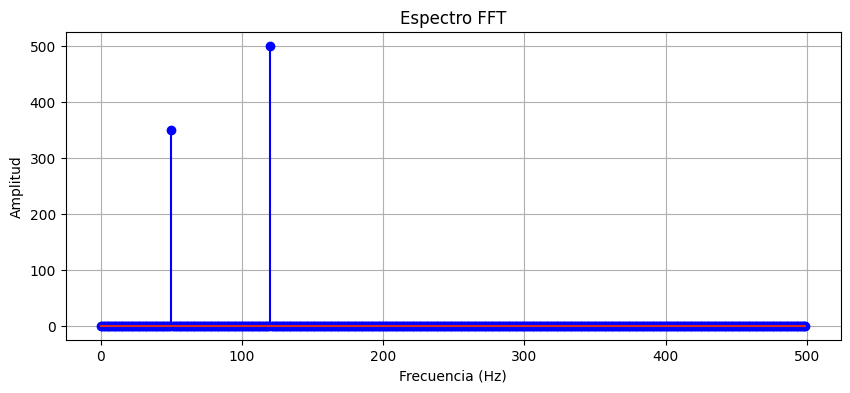

In [1]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Señal de ejemplo
fs = 1000  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)
x = 0.7*np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

# Cálculo FFT
X = fft(x)
N = len(X)
freq = np.arange(N) * fs / N

# Visualización
plt.figure(figsize=(10,4))
plt.stem(freq[:N//2], np.abs(X[:N//2]), 'b')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro FFT')
plt.grid()
plt.show()

### **2.3 Comparación de Costo Computacional**

| Complejidad | Operaciones para N=1024 | Operaciones para N=4096 |
|-------------|-------------------------|-------------------------|
| **DFT** ($O(N^2)$) | $1,048,576$ | $16,777,216$ |
| **FFT** ($O(N \log N)$) | $10,240$ | $49,152$ |

**Ejemplo de escalamiento:**
- Para $N = 2^{20}$ (1,048,576 puntos):
  - DFT requeriría $\approx 1.1 \times 10^{12}$ operaciones
  - FFT solo $\approx 21$ millones de operaciones

## **3. Resumen Comparativo**

| **Método** | **Tipo de Señal** | **Espectro** | **Periodicidad** | **Dominio** |
|------------|-------------------|--------------|------------------|-------------|
| SF | Periódica continua | Discreto | En tiempo | $t$ continuo |
| FT | No periódica continua | Continuo | No aplica | $t$ continuo |
| DTFT | Discreta infinita | Continuo (periódico en $2\pi$) | En frecuencia | $n$ discreto |
| DFT | Discreta finita | Discreto (periódico en $N$) | En tiempo y frecuencia | $n$ discreto |

## **4. Aplicaciones Prácticas**

#### **Áreas clave:**
1. **Procesamiento de señales biomédicas**
   - Análisis de ECG/EEG
   - Detección de anomalías cardíacas

2. **Telecomunicaciones**
   - Análisis espectral de señales 5G
   - Diseño de filtros digitales

3. **Procesamiento de imágenes**
   - Compresión JPEG (transformada discreta del coseno)
   - Reconocimiento de patrones

4. **Acústica**
   - Identificación de notas musicales
   - Diseño de ecualizadores



# **Pregunta 2**


*   Encuentre la función de densidad espectral (transformada de
 Fourier) para las siguientes señales (sin aplicar propiedades):

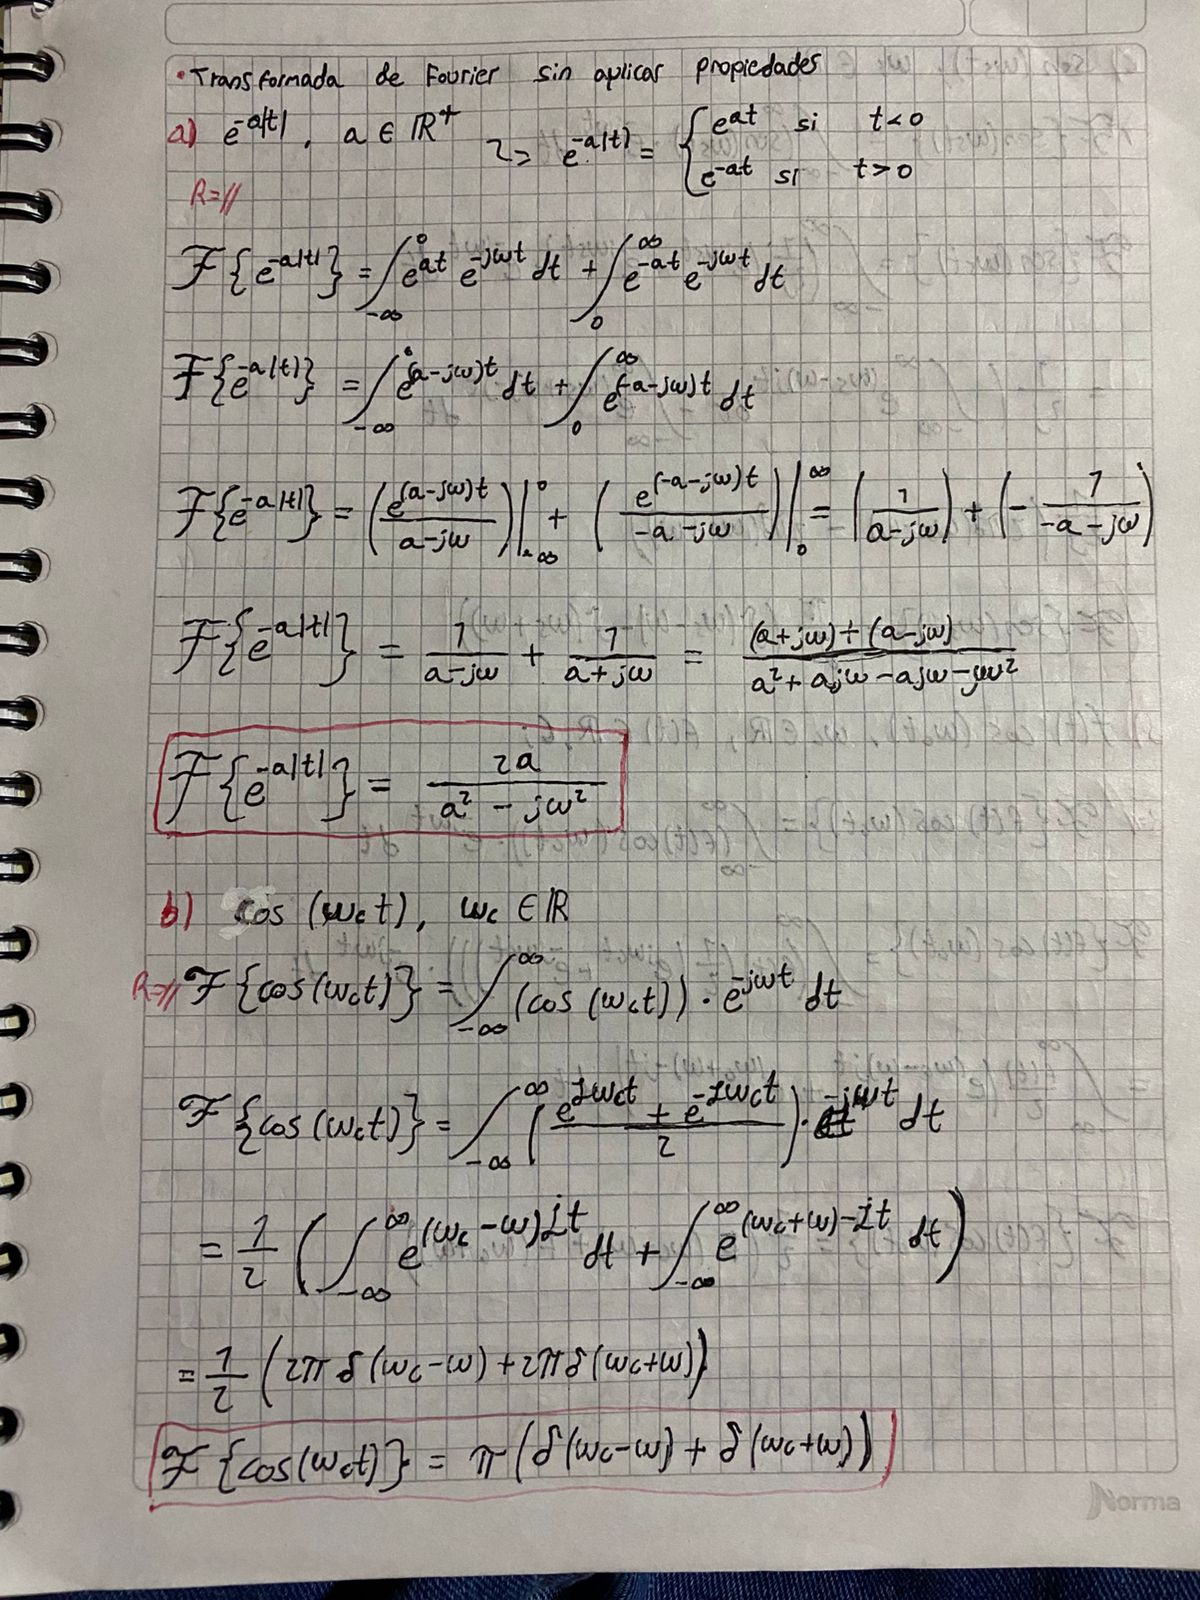

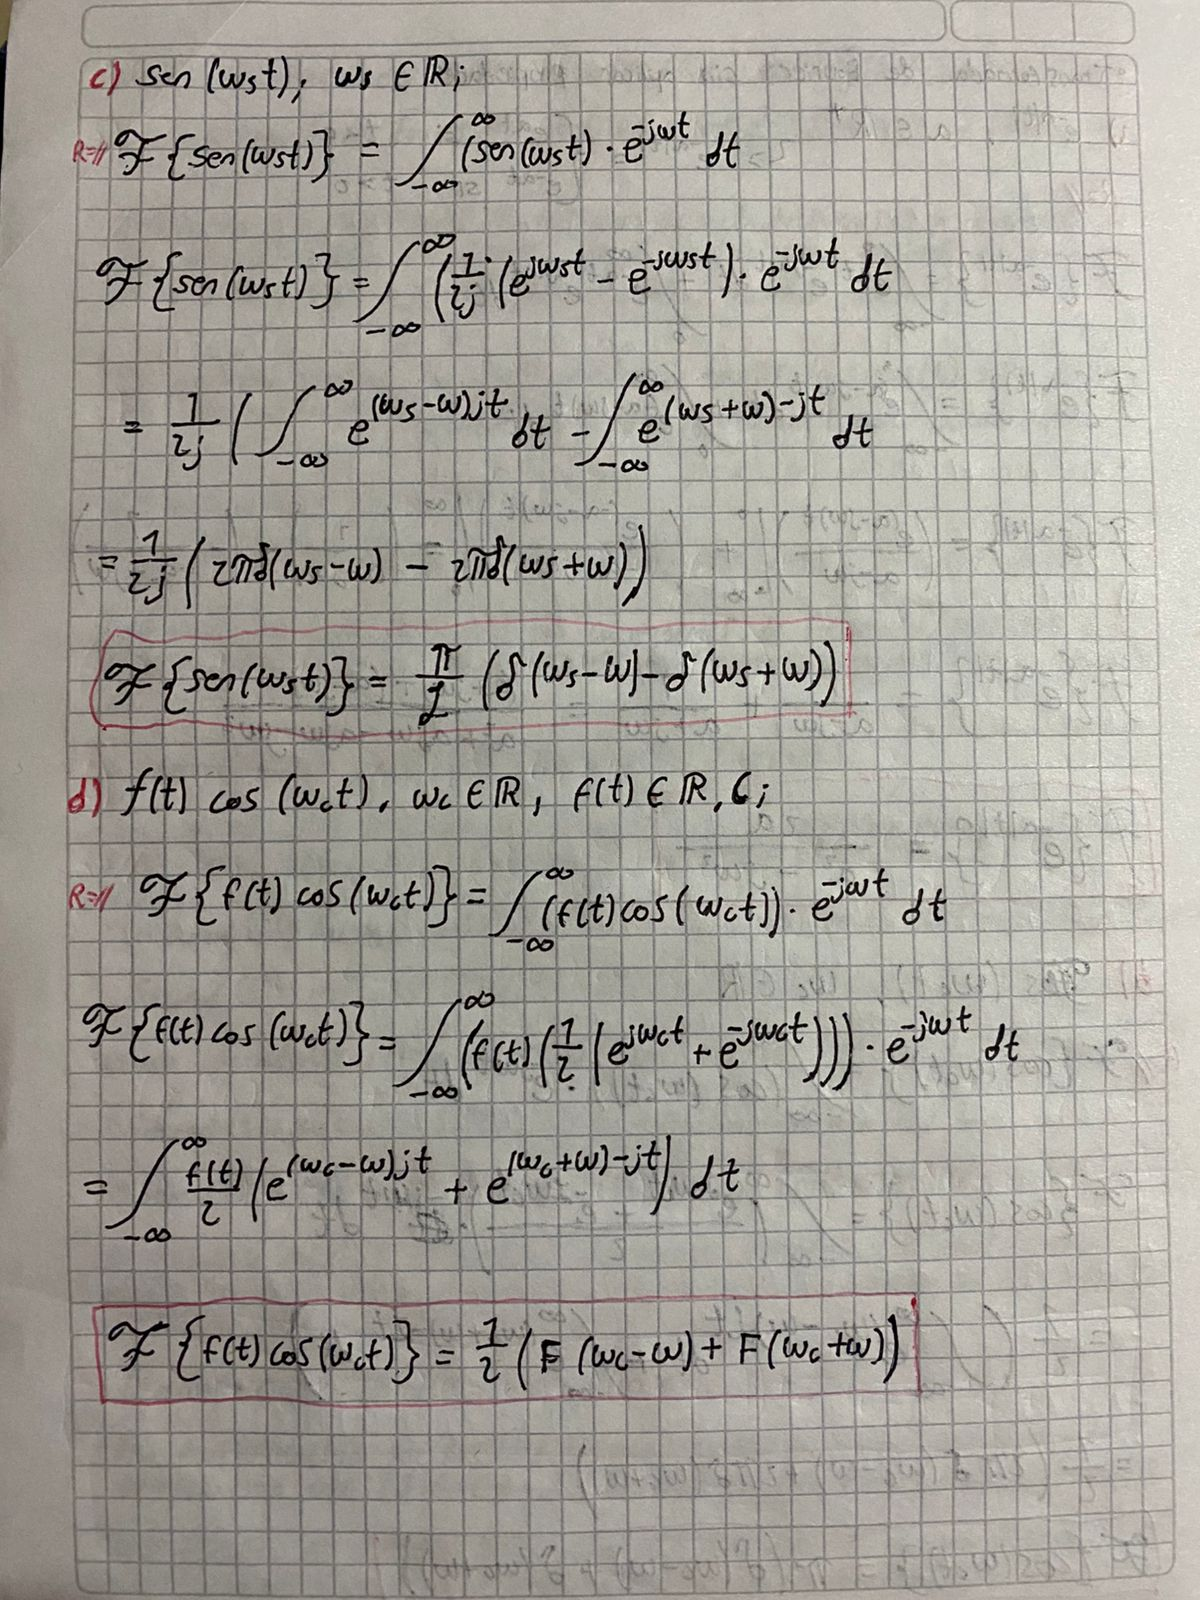

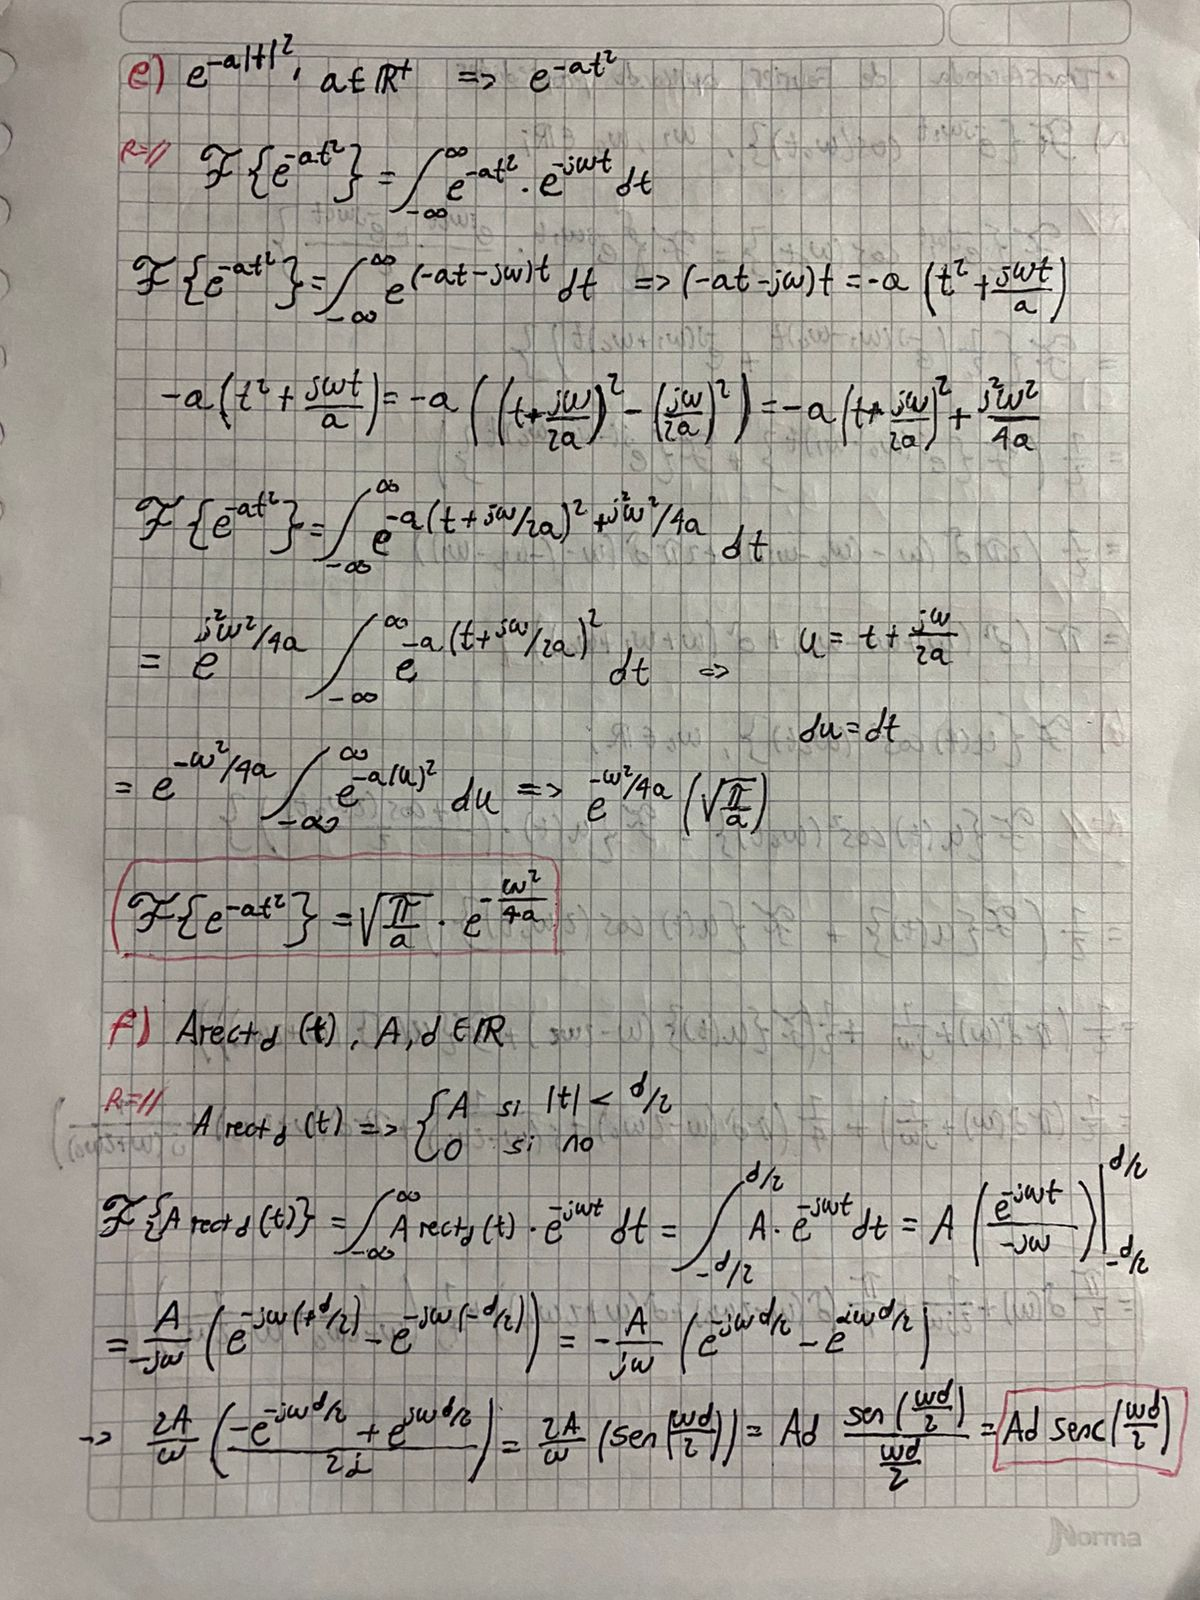

*   Aplique las propiedades de la transformada de Fourier para resolver:

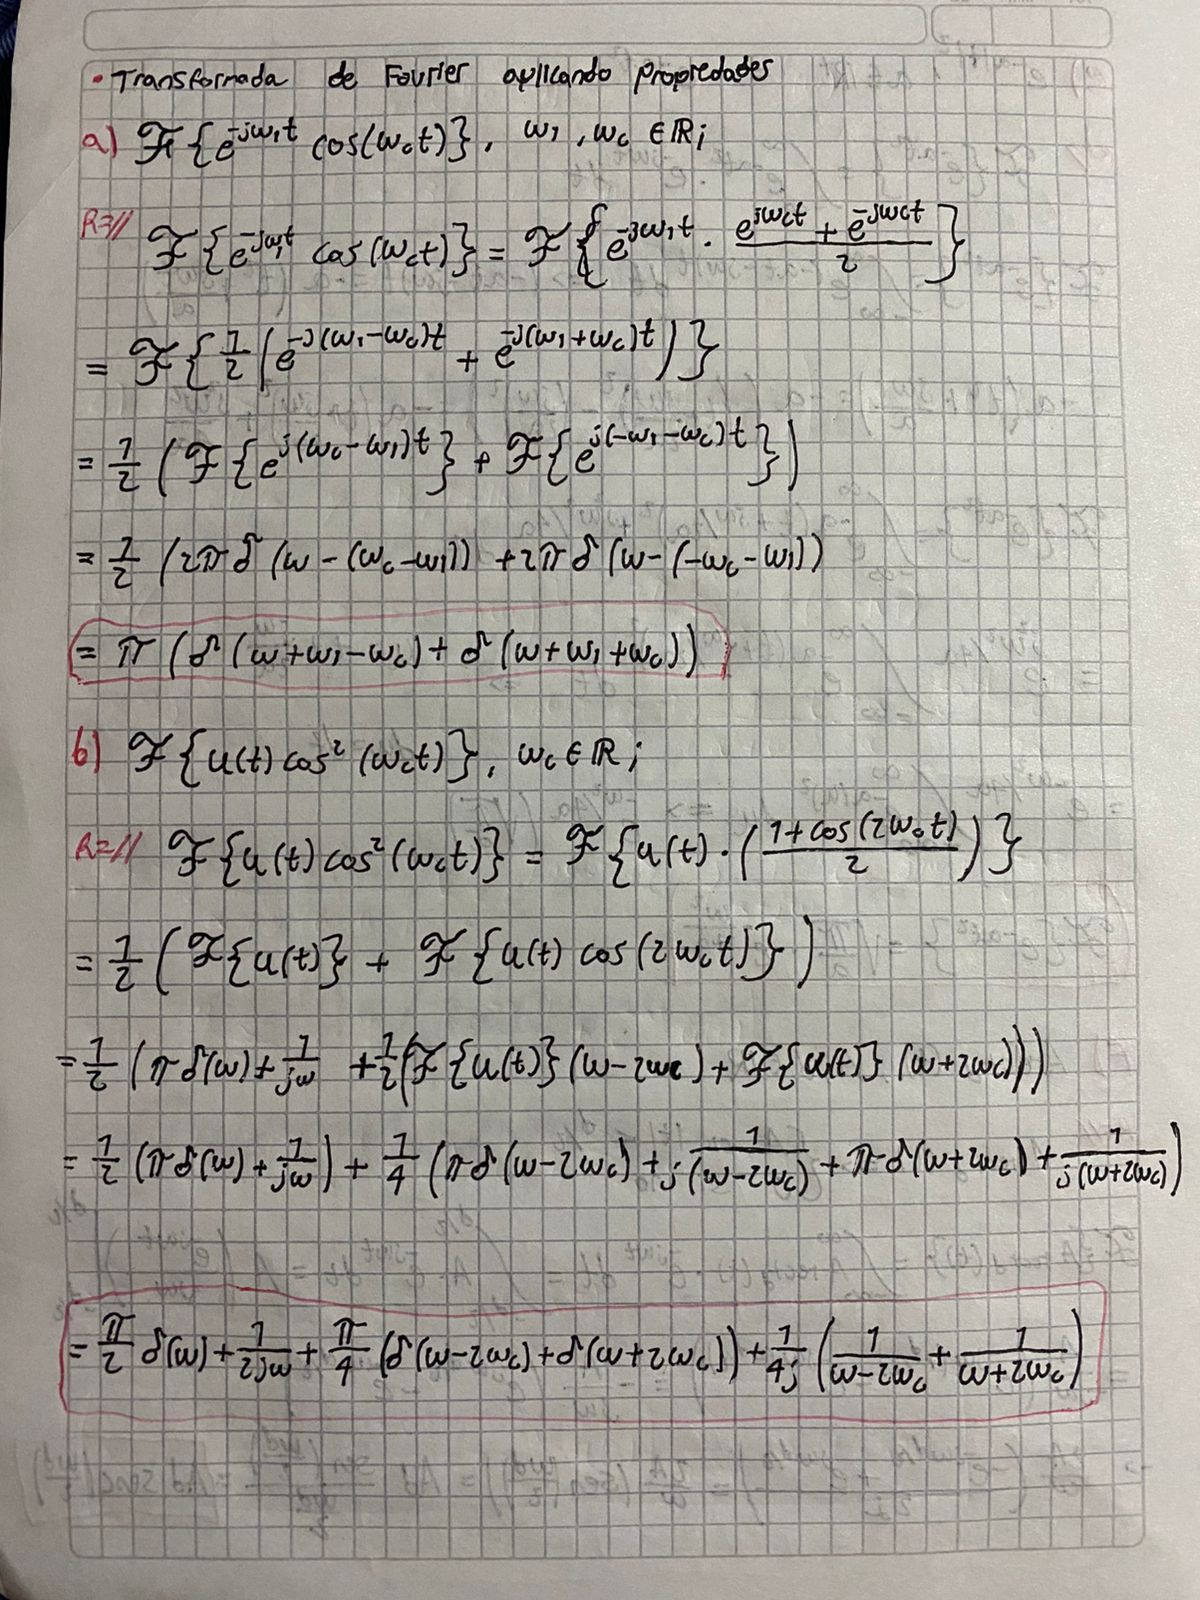

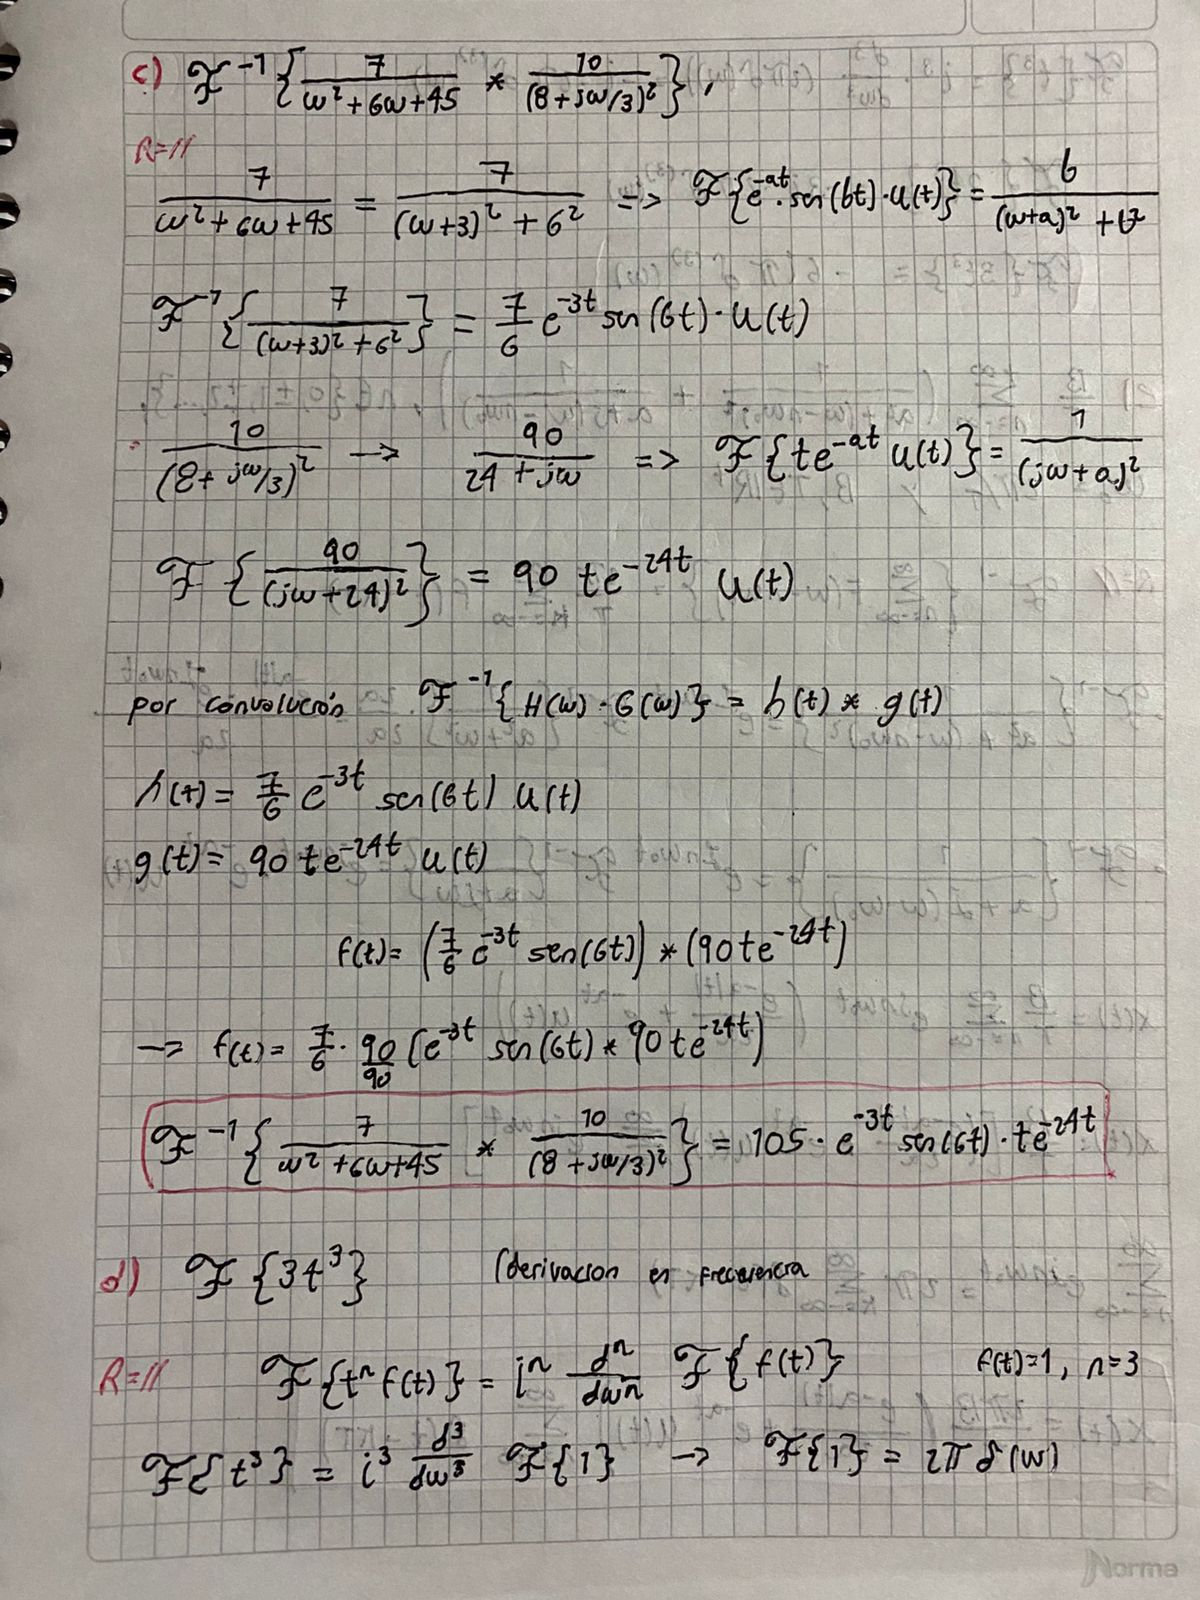

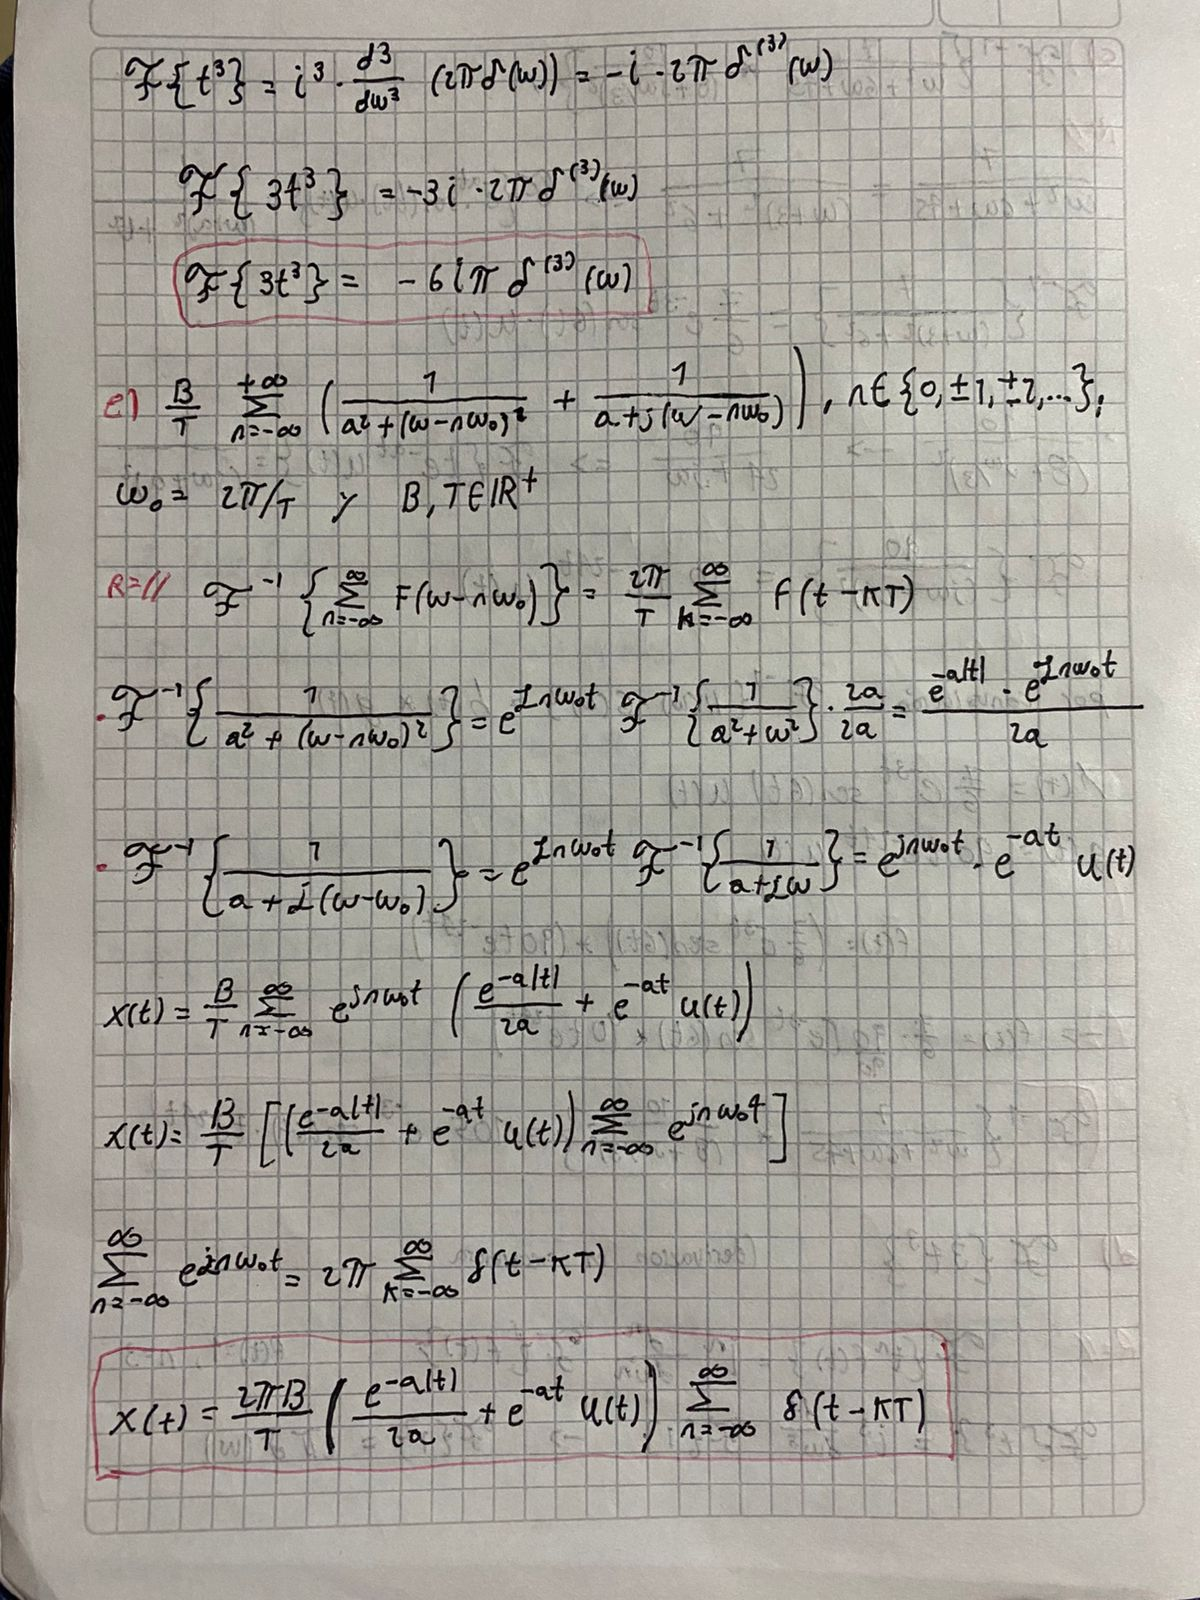

# **Pregunta 3**


*   Consulte en que consiste la modulación por amplitud por
 detección coherente y sus aplicaciones. Genere un ejemplo
 ilustrativo sobre Python en el que se grafique las señales en
 el tiempo y en frecuencia (utilizando la ‘rfft‘) para: señal
 mensaje tipo pulso rectangular y señal mensaje tipo coseno.
 El usuario podrá definir el índice de modulación de interés.

#**R=/**
#**Modulación por Amplitud con Detección Coherente**

* La modulación de amplitud (AM) es una técnica de modulación en la que la amplitud de una señal portadora de alta frecuencia se varía en proporción a la señal de mensaje o moduladora (la información que se quiere transmitir).

* La detección coherente, también conocida como detección síncrona, es un método para demodular la señal AM. En este proceso, la señal AM recibida se multiplica por una señal sinusoidal generada localmente en el receptor, que tiene la misma frecuencia y fase que la señal portadora original. Luego, se utiliza un filtro pasabajos para recuperar la señal de mensaje original.

* El principal desafío de la detección coherente es que requiere la sincronización precisa de la frecuencia y la fase de la portadora en el receptor. Si no hay una sincronización perfecta, puede producirse una distorsión en la señal demodulada.

#**Aplicaciones**

La modulación de amplitud se ha utilizado en una amplia variedad de aplicaciones, entre ellas:

* Radiodifusión: Es la aplicación más conocida, especialmente en las bandas de radio AM (onda larga, media y corta).

* Comunicaciones aeronáuticas: Se utiliza para las comunicaciones de voz entre pilotos y controladores de tráfico aéreo.

* Radioaficionados: Es popular entre los radioaficionados para comunicaciones de voz.

* Sistemas de televisión analógica: Se usaba para transmitir la señal de video (luminancia).

* Comunicaciones por radio de dos vías.

#**Ejemplo en Pythone**

A continuación, se presenta un ejemplo en Python que ilustra la modulación de amplitud con una señal de mensaje de pulso rectangular y una señal de mensaje de tipo coseno. Puedes definir el índice de modulación m que desees.

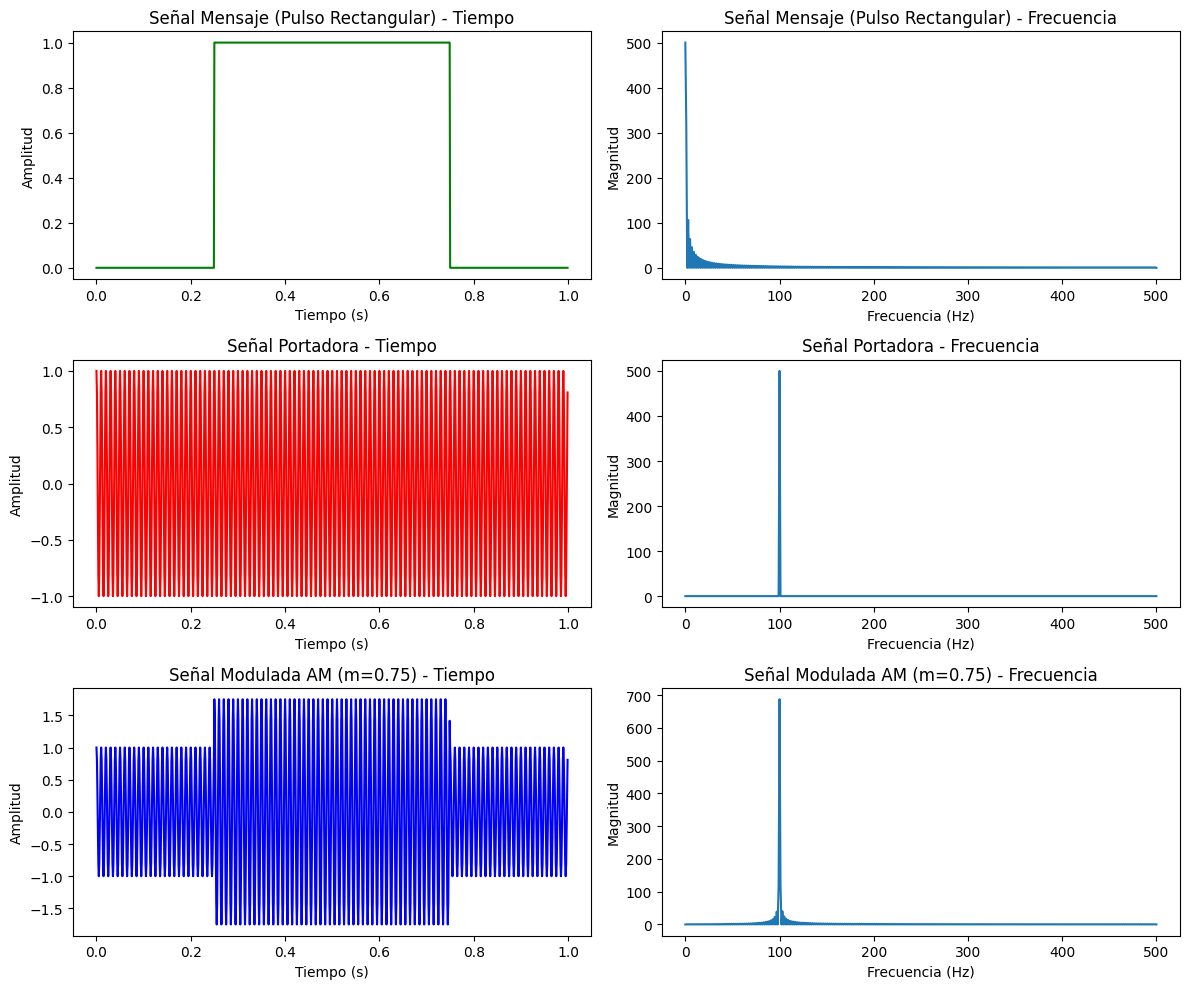

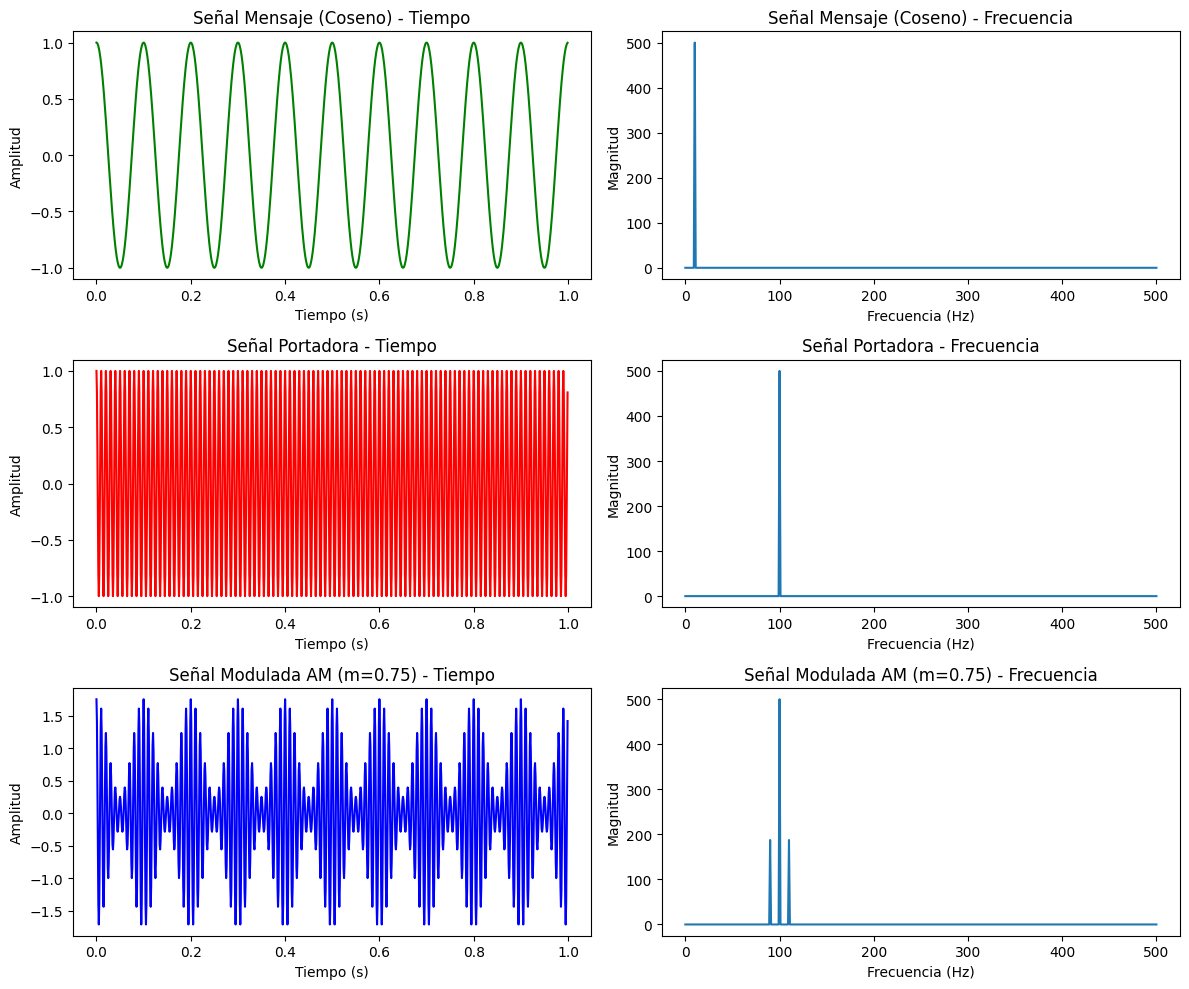

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

def plot_signals(t, msg, carrier, modulated, m, signal_type):
    """Grafica las señales en el dominio del tiempo y la frecuencia."""
    plt.figure(figsize=(12, 10))

    # Señal mensaje en el tiempo
    plt.subplot(3, 2, 1)
    plt.title(f'Señal Mensaje ({signal_type}) - Tiempo')
    plt.plot(t, msg, 'g')
    plt.ylabel('Amplitud')
    plt.xlabel('Tiempo (s)')

    # Espectro de la señal mensaje
    N = len(msg)
    yf = rfft(msg)
    xf = rfftfreq(N, 1 / fs)
    plt.subplot(3, 2, 2)
    plt.title(f'Señal Mensaje ({signal_type}) - Frecuencia')
    plt.plot(xf, np.abs(yf))
    plt.ylabel('Magnitud')
    plt.xlabel('Frecuencia (Hz)')

    # Señal portadora en el tiempo
    plt.subplot(3, 2, 3)
    plt.title('Señal Portadora - Tiempo')
    plt.plot(t, carrier, 'r')
    plt.ylabel('Amplitud')
    plt.xlabel('Tiempo (s)')

    # Espectro de la señal portadora
    N = len(carrier)
    yf = rfft(carrier)
    xf = rfftfreq(N, 1 / fs)
    plt.subplot(3, 2, 4)
    plt.title('Señal Portadora - Frecuencia')
    plt.plot(xf, np.abs(yf))
    plt.ylabel('Magnitud')
    plt.xlabel('Frecuencia (Hz)')


    # Señal modulada en el tiempo
    plt.subplot(3, 2, 5)
    plt.title(f'Señal Modulada AM (m={m}) - Tiempo')
    plt.plot(t, modulated, 'b')
    plt.ylabel('Amplitud')
    plt.xlabel('Tiempo (s)')

    # Espectro de la señal modulada
    N = len(modulated)
    yf = rfft(modulated)
    xf = rfftfreq(N, 1 / fs)
    plt.subplot(3, 2, 6)
    plt.title(f'Señal Modulada AM (m={m}) - Frecuencia')
    plt.plot(xf, np.abs(yf))
    plt.ylabel('Magnitud')
    plt.xlabel('Frecuencia (Hz)')

    plt.tight_layout()
    plt.show()

# --- Parámetros de la simulación ---
fs = 1000  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs) # Vector de tiempo

# --- Parámetros de las señales ---
fm_pulse = 5  # Frecuencia del pulso rectangular
fm_cos = 10   # Frecuencia de la señal coseno
fc = 100      # Frecuencia de la portadora
Ac = 1        # Amplitud de la portadora

# --- Índice de modulación (puedes cambiar este valor) ---
m = 0.75

# --- Señal mensaje: Pulso rectangular ---
msg_pulse = np.zeros_like(t)
msg_pulse[int(fs/4):int(3*fs/4)] = 1

# --- Señal mensaje: Coseno ---
msg_cos = np.cos(2 * np.pi * fm_cos * t)

# --- Señal portadora ---
carrier = Ac * np.cos(2 * np.pi * fc * t)

# --- Modulación AM ---
modulated_pulse = (1 + m * msg_pulse) * carrier
modulated_cos = (1 + m * msg_cos) * carrier

# --- Gráficas ---
plot_signals(t, msg_pulse, carrier, modulated_pulse, m, 'Pulso Rectangular')
plot_signals(t, msg_cos, carrier, modulated_cos, m, 'Coseno')

# **Pregunta 4**


*   Aplicación en comunicaciones- modulación AM. Sea la
 señal portadora c(t) = Ac cos(2πFct), con Ac,Fc ∈ R, y
 la señal mensaje m(t) ∈ R. Encuentre el espectro en fre
cuencia de la señal modulada en amplitud (AM),
$$y(t) =
 (1 + (m(t) / Ac) )  c(t).$$
 Luego,descarguedesdeYouTube,5segun
dos desucanción favorita (capturando del segundo 20 al 25)

 Presente una simulación de modulación por amplitud AM
 (tomando como mensaje el fragmento de la canción escogi
da y con un indice de modulación de 1). Grafique las señales
 en tiempo y frecuencia (magnitud) de la señal mensaje, por
tadora y modulada. Reproduzca los fragmentos de audio del
 mensaje, portadora y señal modulada. Nota: se sugiere utili
zar un canal de señal de audio para el desarrollo del ejercicio.
 Ver Cuaderno guia modulación AM. Luego, sea el demodu
lador en amplitud presentado en la siguiente Figura:


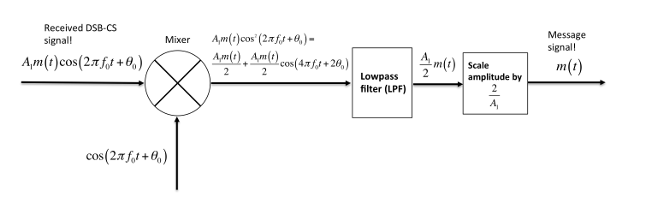

Asumiendo θ0 = 0, determine el espectro en cada una de
 las etapas del sistema. Además, utilizando el fragmento de
 la canción de Youtube, grafique cada una de las etapas prin
cipales del de demodulación en el tiempo y la frecuencia
 (reproduzca el segmento de la canción en cada etapa). No
ta: para la etapa de filtrado pasa bajas, emplee filtrado ideal
 espectral mediante FFT.

#**R=/**


In [35]:
!pip install numpy matplotlib scipy pytube pydub ipython

📥 Descargando audio de: https://youtu.be/lRWqYR3e7xE?si=eabLkpmkzDE8MSZh...
🔴 ERROR: No se pudo procesar el audio de YouTube. Causa: HTTP Error 400: Bad Request
⚠️ Usando una señal de prueba (dos tonos) en su lugar.

Frecuencia de muestreo del audio: 44100 Hz
🎧 Señal Mensaje Original (m(t)):



--- 📡 INICIANDO MODULACIÓN AM ---
🔊 Señal Modulada (AM): (Sonará como un ruido agudo)



--- 📡 INICIANDO DEMODULACIÓN COHERENTE ---
🔊 Señal Recuperada Final (m_rec(t)):



--- 📊 GENERANDO GRÁFICAS ---


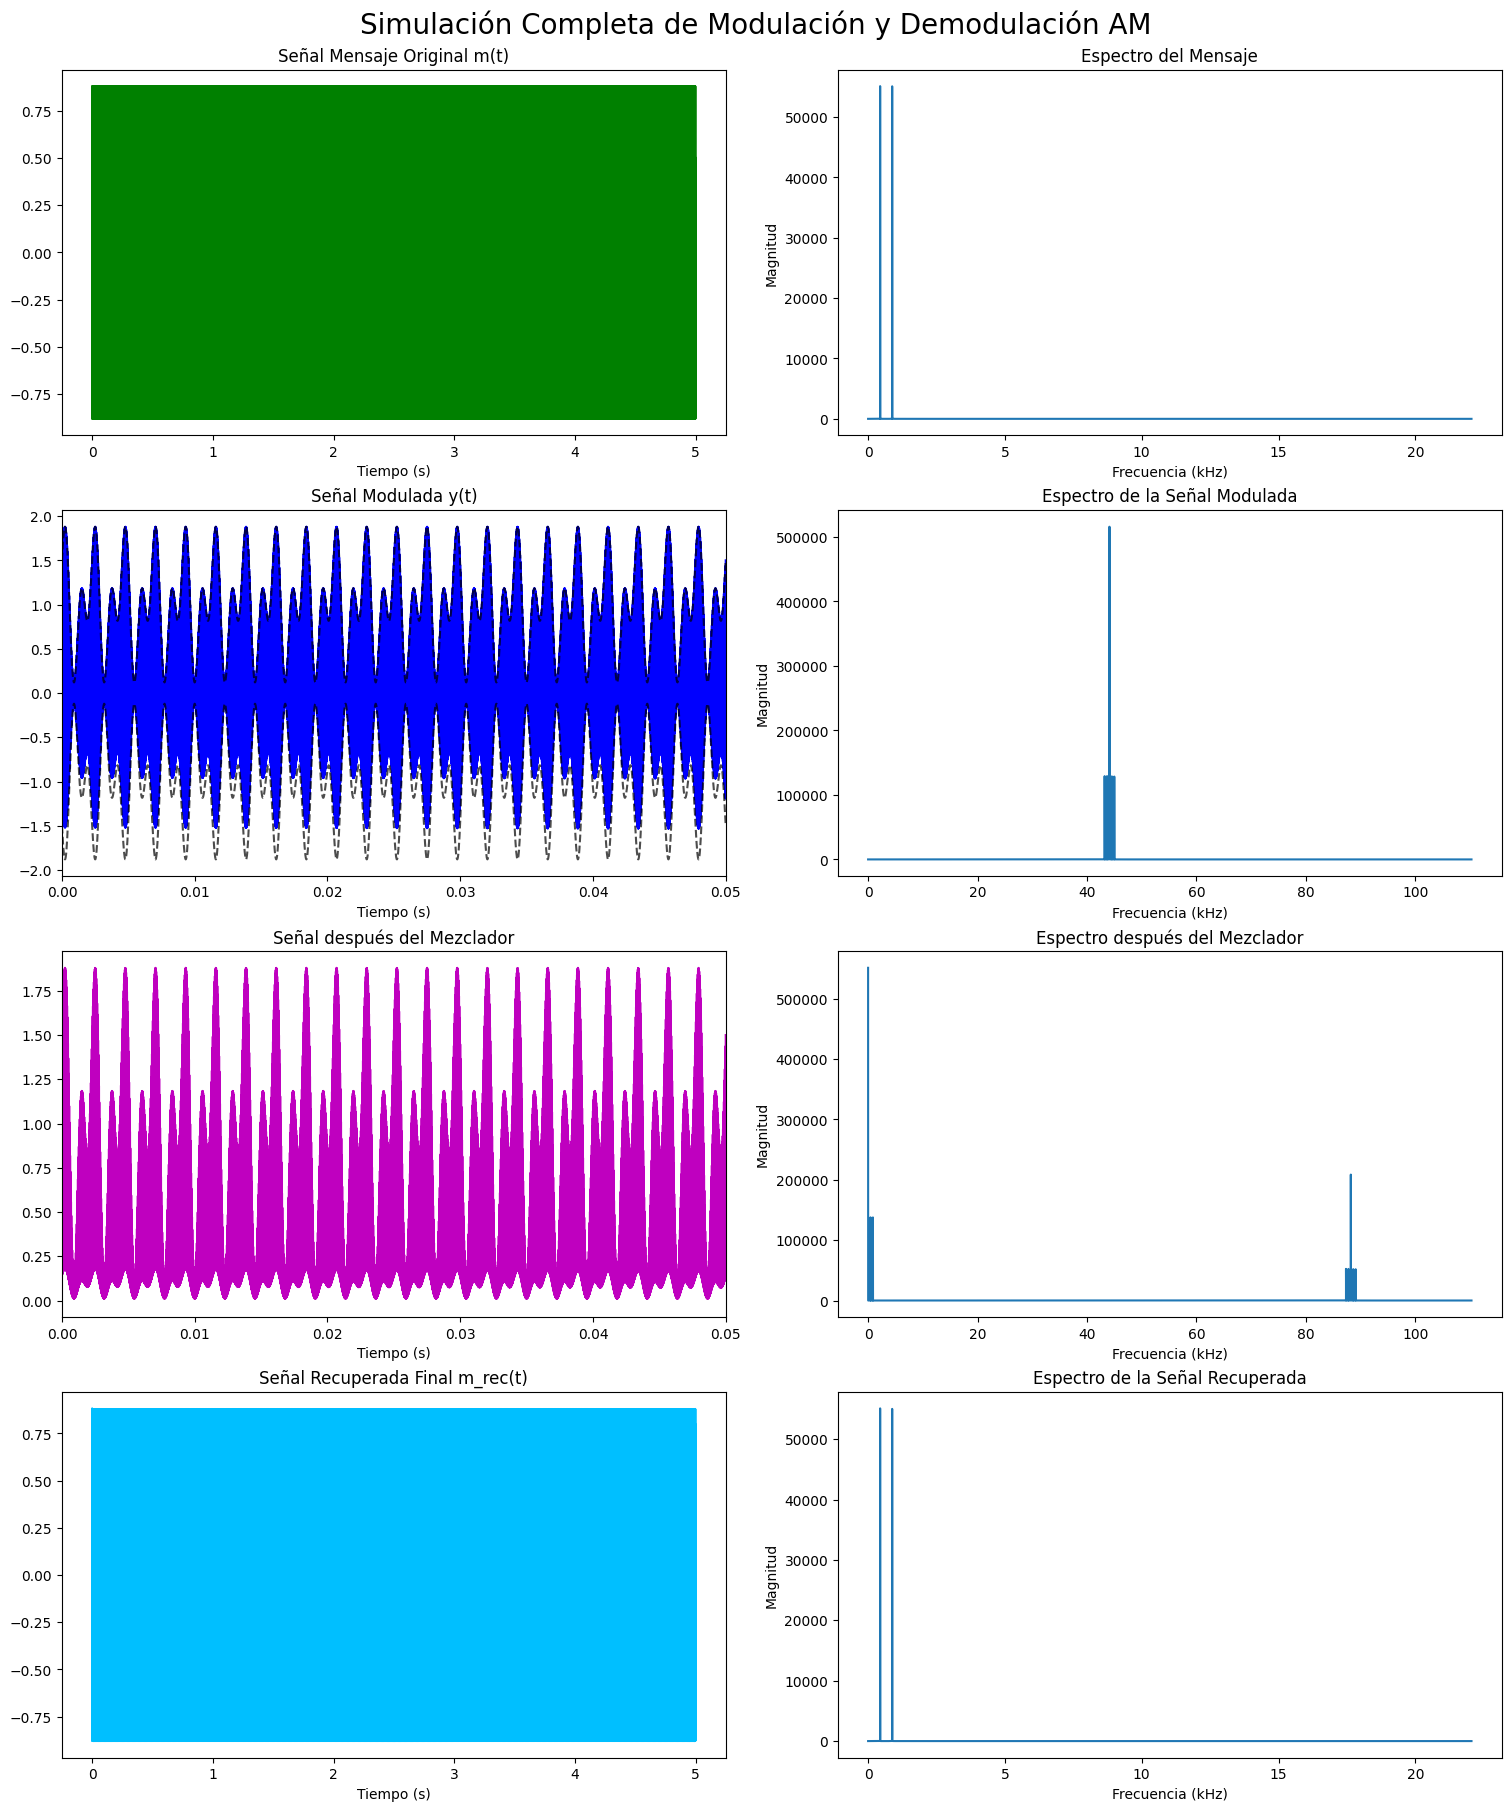

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft
from IPython.display import Audio, display
import io
import warnings

# --- Librerías para descargar de YouTube ---
from pytube import YouTube
from pydub import AudioSegment

# Suprimir advertencias que a veces muestra Pytube
warnings.filterwarnings('ignore', category=UserWarning, module='pytube.__main__')

# --- 1. Carga y Preparación del Audio desde YouTube ---

# ▼▼▼ ENLACE DE YOUTUBE ▼▼▼
# Este enlace es de un audio de prueba (libre de derechos) que es más estable para descargas.
# Puedes cambiarlo por el de tu canción, pero podría fallar si YouTube lo bloquea.
youtube_url = 'https://youtu.be/lRWqYR3e7xE?si=eabLkpmkzDE8MSZh'

try:
    print(f"📥 Descargando audio de: {youtube_url}...")
    yt = YouTube(youtube_url)
    audio_stream = yt.streams.filter(only_audio=True).first()

    buffer = io.BytesIO()
    audio_stream.stream_to_buffer(buffer)
    buffer.seek(0)

    print("🔄 Procesando el audio...")
    song = AudioSegment.from_file(buffer)

    # Tomar el fragmento de 20s a 25s (pydub usa milisegundos)
    start_ms = 20 * 1000
    end_ms = 25 * 1000
    fragment = song[start_ms:end_ms]

    fs_audio = fragment.frame_rate
    audio_samples = np.array(fragment.get_array_of_samples())

    if fragment.channels > 1:
        audio_samples = audio_samples.reshape((-1, fragment.channels)).mean(axis=1)

    m_t = audio_samples / np.max(np.abs(audio_samples))
    print("✅ Audio listo para simulación.")

except Exception as e:
    print(f"🔴 ERROR: No se pudo procesar el audio de YouTube. Causa: {e}")
    print("⚠️ Usando una señal de prueba (dos tonos) en su lugar.")
    fs_audio = 44100
    duration = 5
    t_audio = np.linspace(0., duration, int(fs_audio * duration))
    m_t = 0.5 * np.cos(2 * np.pi * 440 * t_audio) + 0.5 * np.sin(2 * np.pi * 880 * t_audio)

# Vector de tiempo para el fragmento
t = np.linspace(0, len(m_t) / fs_audio, num=len(m_t))

print(f"\nFrecuencia de muestreo del audio: {fs_audio} Hz")
print("🎧 Señal Mensaje Original (m(t)):")
display(Audio(m_t, rate=fs_audio))

# --- 2. Simulación de Modulación AM ---
print("\n--- 📡 INICIANDO MODULACIÓN AM ---")

# Parámetros
m_idx = 1.0     # Índice de modulación
Ac = 1.0      # Amplitud de la portadora
Fc = 2 * (fs_audio / 2) # Frecuencia portadora, ej. 44.1 kHz, para evitar solapamiento

# Simulación a una frecuencia de muestreo más alta para representar la portadora sin aliasing
fs_sim = 5 * Fc
t_sim = np.linspace(0, len(m_t) / fs_audio, int(len(m_t) * fs_sim / fs_audio))
m_t_sim = np.interp(t_sim, t, m_t) # Re-muestrear el mensaje a fs_sim

# Señales
carrier = Ac * np.cos(2 * np.pi * Fc * t_sim)
modulated = (1 + m_idx * m_t_sim) * carrier

print("🔊 Señal Modulada (AM): (Sonará como un ruido agudo)")
display(Audio(modulated, rate=fs_sim))

# --- 3. Simulación de Demodulación Coherente ---
print("\n--- 📡 INICIANDO DEMODULACIÓN COHERENTE ---")

# Etapa 1: Multiplicador (Mixer)
local_oscillator = np.cos(2 * np.pi * Fc * t_sim)
mixed_signal = modulated * local_oscillator

# Etapa 2: Filtro Paso Bajas (LPF Ideal en Frecuencia)
mixed_fft = rfft(mixed_signal)
freqs = rfftfreq(len(mixed_signal), 1/fs_sim)
cutoff_freq = fs_audio / 2
mixed_fft[freqs > cutoff_freq] = 0
lpf_output = irfft(mixed_fft)

# Etapa 3: Bloqueo de DC y Escalado para recuperar la amplitud
dc_component = np.mean(lpf_output)
signal_no_dc = lpf_output - dc_component
recovered_signal = signal_no_dc * 2

# Re-muestrear de vuelta a la frecuencia de audio original para una comparación justa
recovered_final = np.interp(t, t_sim, recovered_signal)

print("🔊 Señal Recuperada Final (m_rec(t)):")
display(Audio(recovered_final, rate=fs_audio))

# --- 4. Gráficas del Proceso Completo ---
print("\n--- 📊 GENERANDO GRÁFICAS ---")

def plot_spectrum(signal, fs, title, ax, xlim=None):
    N = len(signal)
    yf = rfft(signal)
    xf = rfftfreq(N, 1 / fs)
    ax.plot(xf / 1000, np.abs(yf)) # Frecuencia en kHz
    ax.set_title(title)
    ax.set_xlabel('Frecuencia (kHz)')
    ax.set_ylabel('Magnitud')
    if xlim:
        ax.set_xlim(xlim)

fig, axs = plt.subplots(4, 2, figsize=(15, 18), constrained_layout=True)
fig.suptitle('Simulación Completa de Modulación y Demodulación AM', fontsize=20)

# Fila 1: Mensaje Original
axs[0, 0].plot(t, m_t, 'g')
axs[0, 0].set_title('Señal Mensaje Original m(t)')
axs[0, 0].set_xlabel('Tiempo (s)')
plot_spectrum(m_t, fs_audio, 'Espectro del Mensaje', axs[0, 1])

# Fila 2: Señal Modulada
axs[1, 0].plot(t_sim, modulated, 'b')
axs[1, 0].plot(t_sim, Ac * (1 + m_idx * m_t_sim), 'k--', alpha=0.7, label='Envolvente')
axs[1, 0].plot(t_sim, -Ac * (1 + m_idx * m_t_sim), 'k--', alpha=0.7)
axs[1, 0].set_title('Señal Modulada y(t)')
axs[1, 0].set_xlabel('Tiempo (s)')
axs[1, 0].set_xlim(0, 0.05) # Zoom para ver la portadora
plot_spectrum(modulated, fs_sim, 'Espectro de la Señal Modulada', axs[1, 1])

# Fila 3: Señal Post-Mezclador y LPF
axs[2, 0].plot(t_sim, mixed_signal, 'm')
axs[2, 0].set_title('Señal después del Mezclador')
axs[2, 0].set_xlabel('Tiempo (s)')
axs[2, 0].set_xlim(0, 0.05) # Zoom
plot_spectrum(mixed_signal, fs_sim, 'Espectro después del Mezclador', axs[2, 1])

# Fila 4: Señal Recuperada
axs[3, 0].plot(t, recovered_final, color='deepskyblue')
axs[3, 0].set_title('Señal Recuperada Final m_rec(t)')
axs[3, 0].set_xlabel('Tiempo (s)')
plot_spectrum(recovered_final, fs_audio, 'Espectro de la Señal Recuperada', axs[3, 1])

plt.show()

# **Pregunta 5**


*  Aplicación en circuitos eléctricos- potencia. Consulte en
 qué consiste la distorsión total de armónicos (Total Harmo
nic Distortion-(THD)) y el factor de potencia en un circui
to eléctrico. Cómo puede calcularse el THD desde la FFT?.
 Cómo puede calcularse la distorsión del factor de potencia
 con base al THD?. Genere un ejemplo ilustrativo para el
 cálculo del THD y la distorsión del factor de potencia pa
ra un rectificador de onda completa con carga: i) netamente
 resistiva y ii) carga RC en serie. Establezca las condiciones
 necesarias para las simulaciones y pruebe con diferentes va
lores de R y C. Discuta los resultados obtenidos. Ver cua
derno Rectificador RC y THD.

#**R=/**
#**Distorsión Armónica Total (THD) y Factor de Potencia en Circuitos Eléctricos**

* En los circuitos eléctricos, especialmente aquellos que involucran cargas no lineales (como los rectificadores), las formas de onda de corriente y/o voltaje pueden dejar de ser puramente sinusoidales y contener componentes armónicas. Esto tiene un impacto significativo en la calidad de la energía.

# Distorsión Armónica Total (THD)

* La Distorsión Armónica Total (THD) es una medida de la distorsión de una forma de onda con respecto a una sinusoide ideal. Se define como la relación entre el valor RMS (Root Mean Square) de todos los componentes armónicos (a partir de la segunda armónica) y el valor RMS de la componente fundamental (la frecuencia principal de la señal). Se expresa comúnmente como un porcentaje.

* Una forma de onda sinusoidal pura tiene un THD del 0%. Cuanto mayor sea el THD, más distorsionada estará la forma de onda, lo que implica una mayor presencia de armónicos. Los armónicos son múltiplos enteros de la frecuencia fundamental (ej., si la fundamental es 60 Hz, los armónicos serán 120 Hz, 180 Hz, etc.).

* El THD puede ser de corriente (THD_I) o de voltaje (THD_V). Ambos son importantes para evaluar la calidad de la energía.

# Factor de Potencia

* El Factor de Potencia (FP) en un circuito AC es la relación entre la potencia real (activa) absorbida por la carga (medida en vatios, W) y la potencia aparente que fluye en el circuito (medida en voltiamperios, VA). Es una medida de la eficiencia con la que la energía eléctrica se convierte en trabajo útil. Un factor de potencia de 1 (o 100%) indica que toda la potencia aparente se utiliza como potencia real.

* En sistemas con formas de onda sinusoidales puras, el factor de potencia se conoce como factor de potencia de desplazamiento (
textPF_textdesplazamiento) y es simplemente el coseno del ángulo de fase (
phi) entre el voltaje y la corriente:

  $$PF
desplazamiento
​
 =cos(ϕ)$$

* Sin embargo, en presencia de armónicos (es decir, distorsión de la forma de onda), el factor de potencia total (también llamado verdadero factor de potencia o
textPF_textverdadero) también considera la distorsión.


#**Cálculo del THD desde la FFT**
Usarás la Transformada Rápida de Fourier (FFT) para convertir la señal del tiempo a la frecuencia. Una vez que tengas el espectro, podrás identificar la magnitud de la fundamental y de cada armónico. Luego, aplicarás la fórmula del THD que incluye la raíz cuadrada de la suma de los cuadrados de las magnitudes RMS de los armónicos, dividida por la magnitud RMS de la fundamental.
#**¿Cómo calcular el Factor de Distorsión con THD?**

El Factor de Distorsión se calcula con la fórmula

$$
 \frac{1}{\sqrt{1+THD_I^2}}$$

 donde THD
I
​
  es el THD de la corriente (expresado en decimal, no en porcentaje). El PF
verdadero
​
  se obtiene multiplicando este factor por el cos(ϕ) (el PF
desplazamiento
​
 ).



Vas a simular un rectificador de onda completa con dos tipos de carga:

#Carga Resistiva (R):

Verás que el voltaje y la corriente en la carga son ondas pulsantes (forma de onda de "doble joroba").

El THD de voltaje y corriente será significativo.

El factor de potencia de desplazamiento será cercano a 1 (ideal para cargas resistivas), pero el factor de distorsión y, por ende, el verdadero factor de potencia, serán bajos debido a la alta distorsión de la corriente de entrada.

#Carga RC en Serie (R y C):

El capacitor (C) suavizará el voltaje de salida, haciéndolo más parecido a una DC con menos rizado (esto reduce el THD del voltaje de salida).

Sin embargo, la corriente de entrada que extrae el rectificador de la fuente AC se volverá mucho más pulsante y distorsionada (solo hay picos de corriente cuando el voltaje de entrada supera al voltaje del capacitor). Esto causará un THD de corriente mucho más alto.

Como consecuencia, el verdadero factor de potencia será considerablemente más bajo que en el caso resistivo, ya que el factor de distorsión empeora significativamente.

--- Rectificador de Onda Completa con Carga Resistiva ---

Simulando con R = 100 Ohms
THD de Corriente (THD_I) para R=100: 22.73%
THD de Voltaje (THD_V) para R=100: 22.73%
Factor de Potencia de Desplazamiento (PFd) para R=100: 1.000
Factor de Distorsión (DF) para R=100: 1.000
Verdadero Factor de Potencia (PF_verdadero) para R=100: 1.000


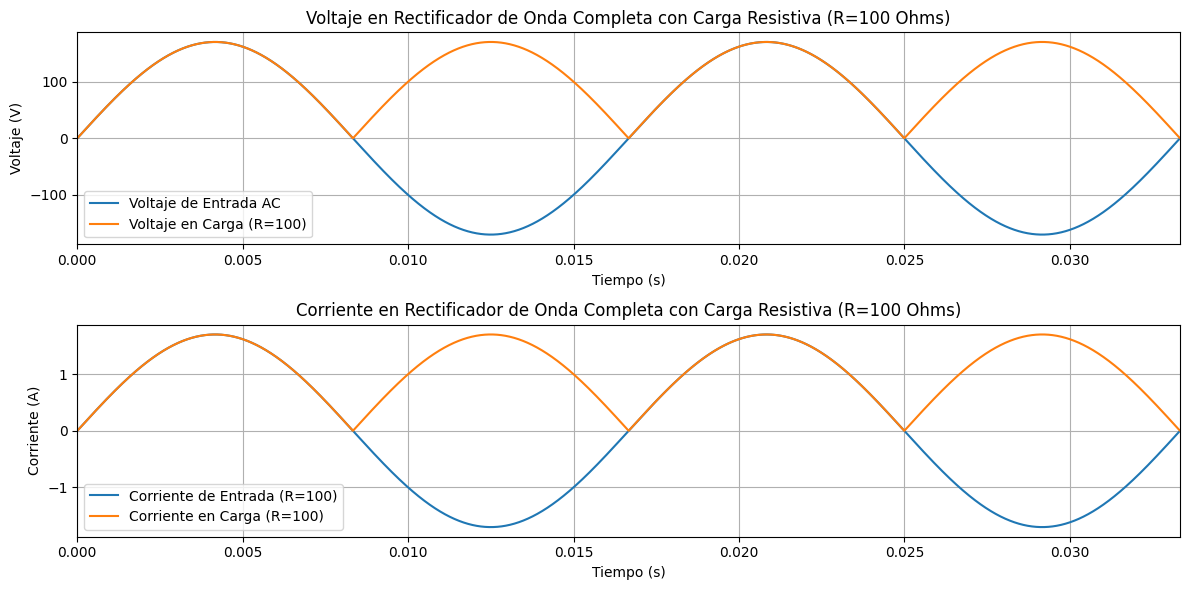


Simulando con R = 500 Ohms
THD de Corriente (THD_I) para R=500: 22.73%
THD de Voltaje (THD_V) para R=500: 22.73%
Factor de Potencia de Desplazamiento (PFd) para R=500: 1.000
Factor de Distorsión (DF) para R=500: 1.000
Verdadero Factor de Potencia (PF_verdadero) para R=500: 1.000


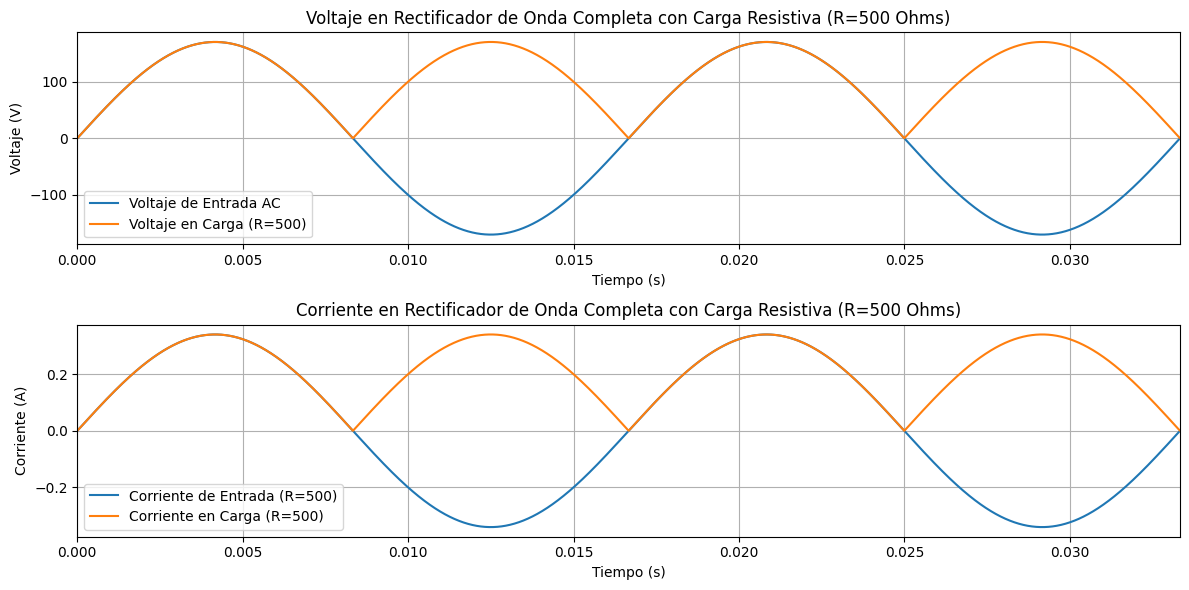


Simulando con R = 1000 Ohms
THD de Corriente (THD_I) para R=1000: 22.73%
THD de Voltaje (THD_V) para R=1000: 22.73%
Factor de Potencia de Desplazamiento (PFd) para R=1000: 1.000
Factor de Distorsión (DF) para R=1000: 1.000
Verdadero Factor de Potencia (PF_verdadero) para R=1000: 1.000


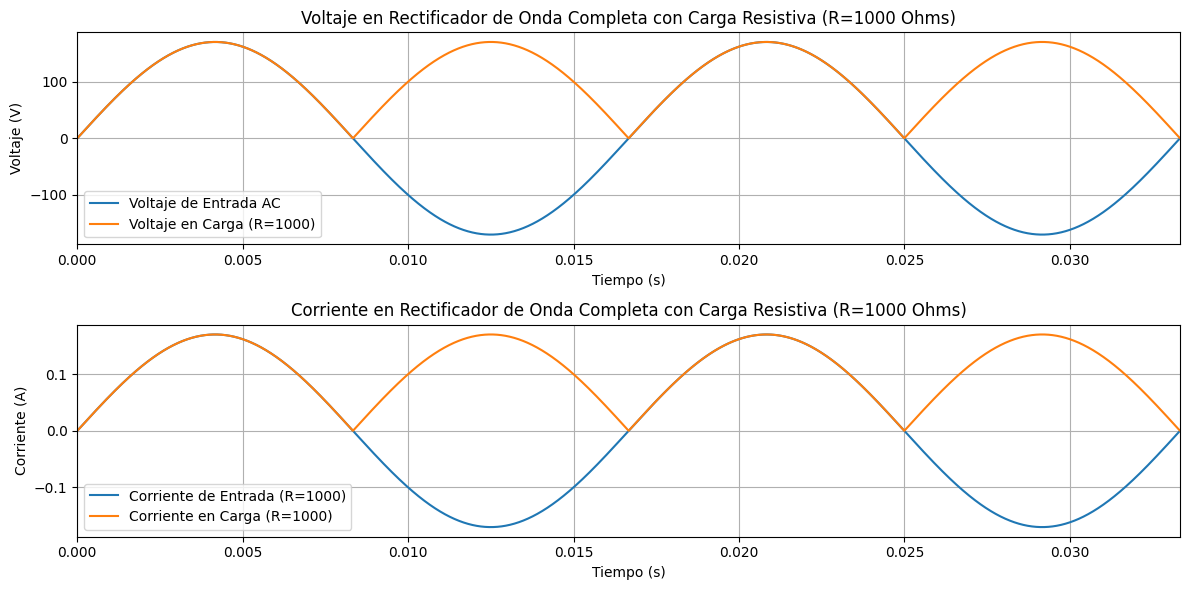


--- Rectificador de Onda Completa con Carga RC en Serie ---

Simulando con R = 100 Ohms, C = 10.0 uF
THD de Corriente (THD_I) para R=100, C=10.0uF: 44.29%
THD de Voltaje (THD_V) para R=100, C=10.0uF: 14.02%
Factor de Potencia de Desplazamiento (PFd) para R=100, C=10.0uF: 0.759
Factor de Distorsión (DF) para R=100, C=10.0uF: 0.914
Verdadero Factor de Potencia (PF_verdadero) para R=100, C=10.0uF: 0.694


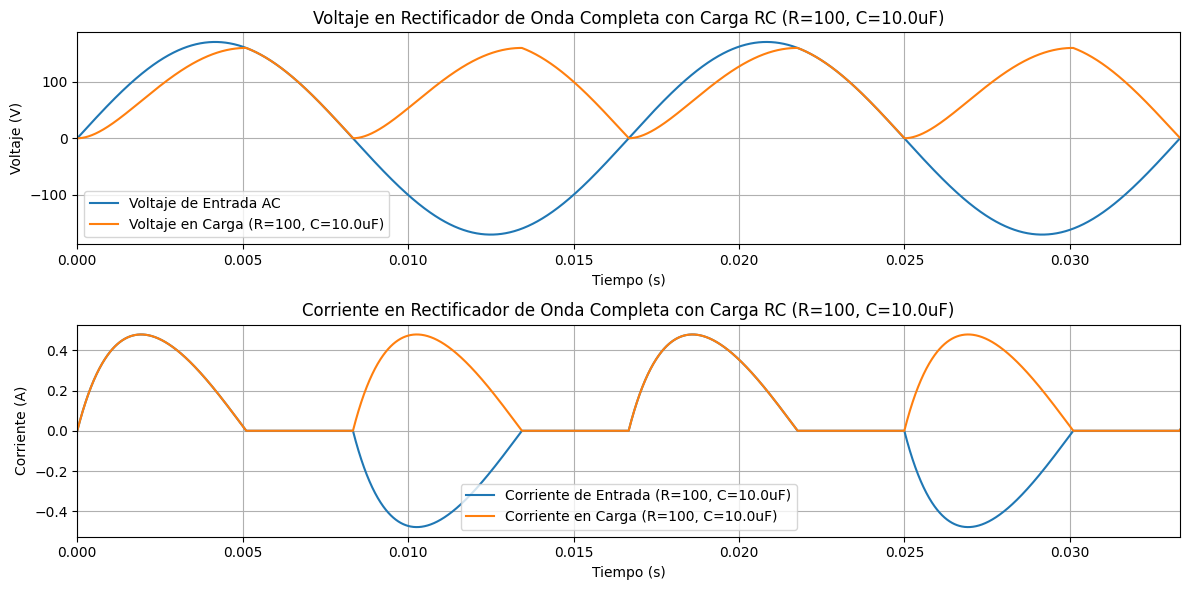


Simulando con R = 100 Ohms, C = 100.0 uF
THD de Corriente (THD_I) para R=100, C=100.0uF: 12.19%
THD de Voltaje (THD_V) para R=100, C=100.0uF: 41.97%
Factor de Potencia de Desplazamiento (PFd) para R=100, C=100.0uF: 0.980
Factor de Distorsión (DF) para R=100, C=100.0uF: 0.993
Verdadero Factor de Potencia (PF_verdadero) para R=100, C=100.0uF: 0.973


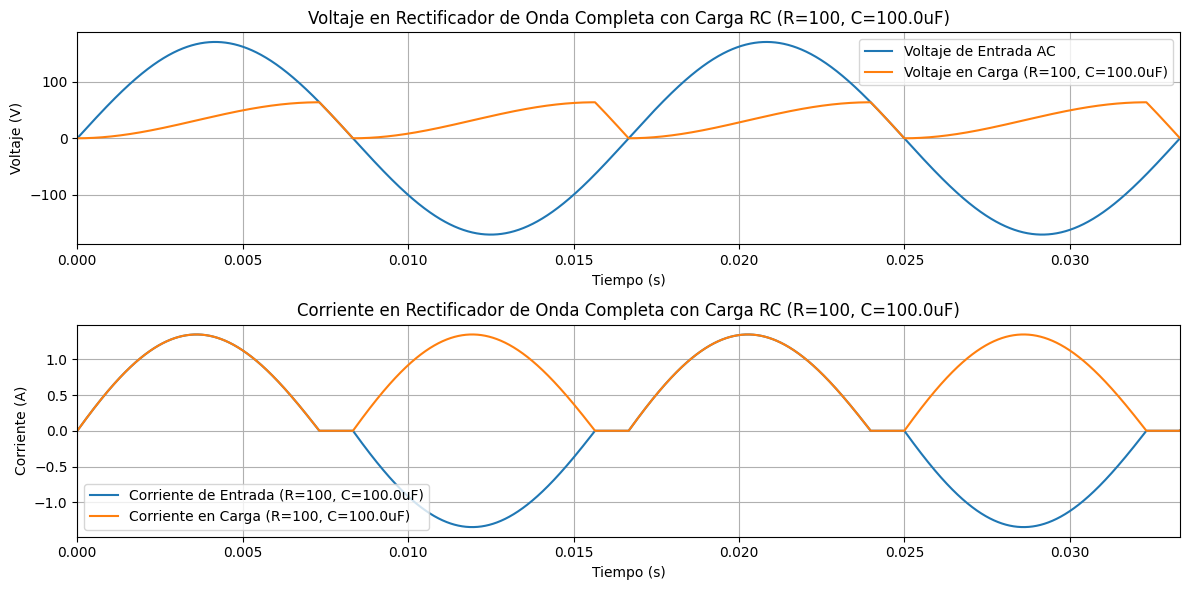


Simulando con R = 500 Ohms, C = 10.0 uF
THD de Corriente (THD_I) para R=500, C=10.0uF: 19.93%
THD de Voltaje (THD_V) para R=500, C=10.0uF: 31.45%
Factor de Potencia de Desplazamiento (PFd) para R=500, C=10.0uF: 0.946
Factor de Distorsión (DF) para R=500, C=10.0uF: 0.981
Verdadero Factor de Potencia (PF_verdadero) para R=500, C=10.0uF: 0.928


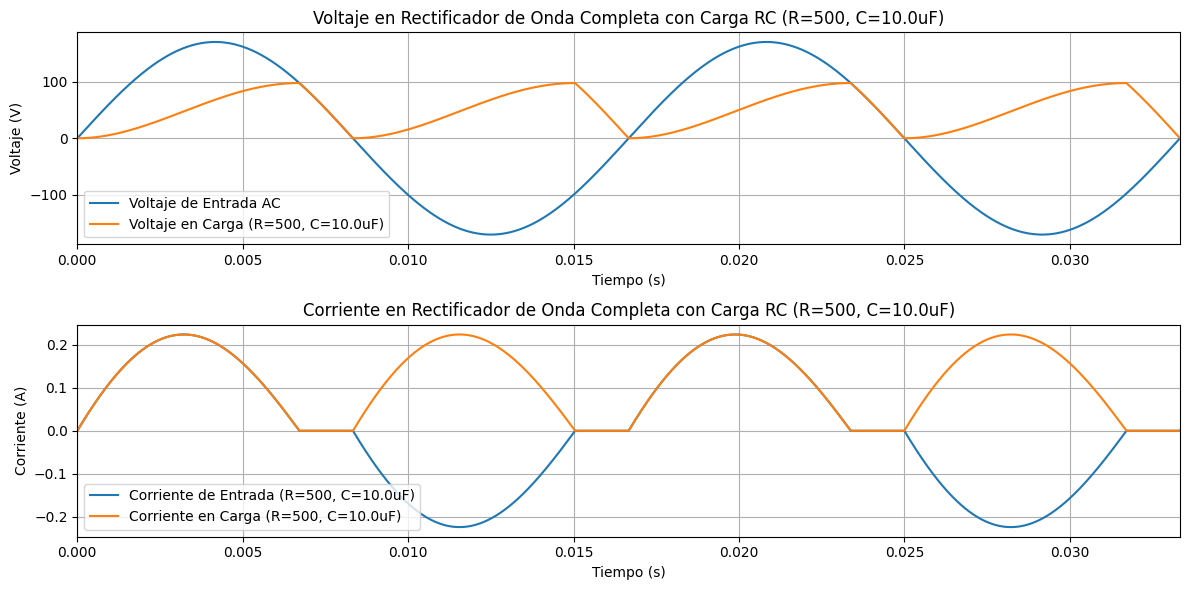


Simulando con R = 500 Ohms, C = 100.0 uF
THD de Corriente (THD_I) para R=500, C=100.0uF: 3.04%
THD de Voltaje (THD_V) para R=500, C=100.0uF: 56.73%
Factor de Potencia de Desplazamiento (PFd) para R=500, C=100.0uF: 0.999
Factor de Distorsión (DF) para R=500, C=100.0uF: 1.000
Verdadero Factor de Potencia (PF_verdadero) para R=500, C=100.0uF: 0.998


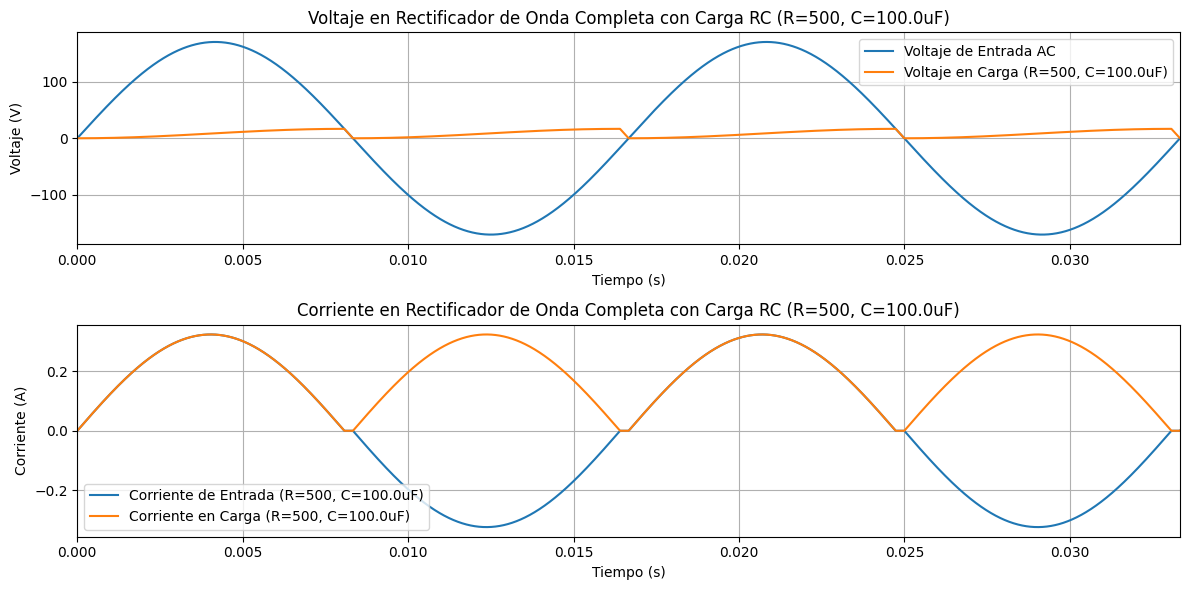

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

# --- Configuración de la simulación ---
Vp = 170             # Amplitud pico de la señal AC de entrada (aproximadamente 120V RMS)
freq = 60            # Frecuencia de la señal AC (Hz)
num_cycles = 10      # Número de ciclos a simular
samples_per_cycle = 2000 # Puntos de muestreo por ciclo (para buena resolución FFT)
sampling_rate = freq * samples_per_cycle # Frecuencia de muestreo
T = num_cycles / freq # Tiempo total de simulación
t = np.linspace(0, T, int(T * sampling_rate), endpoint=False) # Vector de tiempo

# Señal de voltaje de entrada (senoidal)
v_input = Vp * np.sin(2 * np.pi * freq * t)

# --- Funciones auxiliares para cálculo ---

def calculate_thd(signal, sampling_rate, fundamental_freq, num_harmonics=50):
    """
    Calcula el THD de una señal.
    signal: array de la señal en el dominio del tiempo.
    sampling_rate: Frecuencia de muestreo de la señal.
    fundamental_freq: Frecuencia fundamental de la señal.
    num_harmonics: Número de armónicos a considerar para el cálculo del THD.
    """
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sampling_rate)

    # Encontrar el índice de la frecuencia fundamental
    idx_fundamental = np.argmin(np.abs(xf - fundamental_freq))

    # Asegurarse de que el índice no sea 0 si la fundamental no está exactamente en 0 Hz
    # Si la fundamental es muy baja o el muestreo es imperfecto, puede haber un pequeño desajuste
    if idx_fundamental == 0 and fundamental_freq != 0:
        idx_fundamental = np.argmax(np.abs(yf[1:])) + 1 # Busca el pico más grande después de DC

    if idx_fundamental == 0: # Si aún es 0 (ej. señal DC o error), retornar 0
        return 0, []

    # Magnitud RMS de la fundamental
    rms_fundamental = np.abs(yf[idx_fundamental]) / N * np.sqrt(2) # Magnitud pico / sqrt(2)

    # Calcular las magnitudes RMS de los armónicos
    harmonic_rms_sum_sq = 0
    harmonics_data = [] # Para almacenar [frecuencia, magnitud_rms, orden]

    for n in range(2, num_harmonics + 1):
        harmonic_freq = n * fundamental_freq
        idx_harmonic = np.argmin(np.abs(xf - harmonic_freq))

        # Solo considerar armónicos que están dentro del rango de Nyquist
        if idx_harmonic < N / 2 and idx_harmonic != 0:
            rms_harmonic = np.abs(yf[idx_harmonic]) / N * np.sqrt(2)
            harmonic_rms_sum_sq += rms_harmonic**2
            harmonics_data.append([harmonic_freq, rms_harmonic, n])

    if rms_fundamental == 0:
        thd = np.inf # O un valor muy grande si la fundamental es cero
    else:
        thd = (np.sqrt(harmonic_rms_sum_sq) / rms_fundamental) * 100

    return thd, harmonics_data

def calculate_true_power_factor(v_signal, i_signal, sampling_rate, fundamental_freq):
    """
    Calcula el verdadero factor de potencia y el factor de potencia de desplazamiento.
    v_signal: array de la señal de voltaje en el dominio del tiempo.
    i_signal: array de la señal de corriente en el dominio del tiempo.
    """
    N = len(v_signal)
    yf_v = fft(v_signal)
    yf_i = fft(i_signal)
    xf = fftfreq(N, 1 / sampling_rate)

    # Encontrar el índice de la frecuencia fundamental
    idx_fundamental = np.argmin(np.abs(xf - fundamental_freq))
    if idx_fundamental == 0 and fundamental_freq != 0:
        idx_fundamental = np.argmax(np.abs(yf_v[1:])) + 1 # Asume que la fundamental está en el mismo lugar para V e I

    if idx_fundamental == 0:
        return np.nan, np.nan, np.nan # No se pudo determinar la fundamental

    # Magnitudes y ángulos de fase de la fundamental para V e I
    V1_magnitude = np.abs(yf_v[idx_fundamental]) / N * np.sqrt(2)
    I1_magnitude = np.abs(yf_i[idx_fundamental]) / N * np.sqrt(2)

    V1_phase = np.angle(yf_v[idx_fundamental])
    I1_phase = np.angle(yf_i[idx_fundamental])

    # Factor de potencia de desplazamiento
    phi = V1_phase - I1_phase
    displacement_power_factor = np.cos(phi)

    # THD de la corriente (necesario para el factor de distorsión)
    thd_i, _ = calculate_thd(i_signal, sampling_rate, fundamental_freq)

    # Convertir THD a formato decimal para la fórmula
    thd_i_decimal = thd_i / 100

    # Factor de distorsión
    distortion_factor = 1 / np.sqrt(1 + thd_i_decimal**2)

    # Verdadero factor de potencia
    true_power_factor = displacement_power_factor * distortion_factor

    return displacement_power_factor, distortion_factor, true_power_factor

# --- 1. Rectificador de onda completa con carga netamente resistiva ---

print("--- Rectificador de Onda Completa con Carga Resistiva ---")

R_values = [100, 500, 1000] # Ohms

for R in R_values:
    print(f"\nSimulando con R = {R} Ohms")

    # Voltaje rectificado (onda completa) - asumiendo diodos ideales
    v_load_R = np.abs(v_input)

    # Corriente a través de la carga resistiva
    i_load_R = v_load_R / R

    # Calcular THD de la corriente
    thd_i_R, harmonics_i_R = calculate_thd(i_load_R, sampling_rate, freq * 2) # Fundamental del rectificador es 2*freq
    print(f"THD de Corriente (THD_I) para R={R}: {thd_i_R:.2f}%")
    # print("Armónicos de Corriente:", [[f"{h[0]:.0f}Hz", f"{h[1]:.3f}A", h[2]] for h in harmonics_i_R[:5]]) # Mostrar los primeros 5

    # Calcular THD del voltaje (en la carga)
    thd_v_R, harmonics_v_R = calculate_thd(v_load_R, sampling_rate, freq * 2)
    print(f"THD de Voltaje (THD_V) para R={R}: {thd_v_R:.2f}%")
    # print("Armónicos de Voltaje:", [[f"{h[0]:.0f}Hz", f"{h[1]:.3f}V", h[2]] for h in harmonics_v_R[:5]]) # Mostrar los primeros 5

    # Calcular Factor de Potencia (para la entrada, no la carga DC pulsante)
    # Aquí es un poco más complejo, ya que la corriente de entrada al rectificador
    # no es senoidal. Usaremos la corriente de entrada y el voltaje de entrada.

    # La corriente de entrada para un rectificador de onda completa con carga resistiva
    # es esencialmente la forma de onda de la carga rectificada, pero con la polaridad
    # original de la entrada.
    i_input_R_sign = np.sign(v_input) # Obtiene el signo del voltaje de entrada
    i_input_R = np.abs(v_input) / R * i_input_R_sign # Corriente de la fuente AC

    disp_pf_R, dist_pf_R, true_pf_R = calculate_true_power_factor(v_input, i_input_R, sampling_rate, freq) # Fundamental de la entrada es freq
    print(f"Factor de Potencia de Desplazamiento (PFd) para R={R}: {disp_pf_R:.3f}")
    print(f"Factor de Distorsión (DF) para R={R}: {dist_pf_R:.3f}")
    print(f"Verdadero Factor de Potencia (PF_verdadero) para R={R}: {true_pf_R:.3f}")

    # Visualización
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, v_input, label='Voltaje de Entrada AC')
    plt.plot(t, v_load_R, label=f'Voltaje en Carga (R={R})')
    plt.title(f'Voltaje en Rectificador de Onda Completa con Carga Resistiva (R={R} Ohms)')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Voltaje (V)')
    plt.grid(True)
    plt.xlim(0, 2/freq) # Mostrar solo 2 ciclos
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t, i_input_R, label=f'Corriente de Entrada (R={R})')
    plt.plot(t, i_load_R, label=f'Corriente en Carga (R={R})')
    plt.title(f'Corriente en Rectificador de Onda Completa con Carga Resistiva (R={R} Ohms)')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Corriente (A)')
    plt.grid(True)
    plt.xlim(0, 2/freq) # Mostrar solo 2 ciclos
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- 2. Rectificador de onda completa con carga RC en serie ---

print("\n--- Rectificador de Onda Completa con Carga RC en Serie ---")

# Para la carga RC, la simulación requiere un enfoque más detallado de la dinámica del circuito
# Aquí simplificaremos la simulación resolviendo la ecuación diferencial o un modelo discreto
# de carga y descarga del capacitor.

# Parámetros RC
R_values_RC = [100, 500] # Ohms
C_values_RC = [10e-6, 100e-6] # Faradios (10 uF, 100 uF)

for R in R_values_RC:
    for C in C_values_RC:
        print(f"\nSimulando con R = {R} Ohms, C = {C*1e6} uF")

        v_load_RC = np.zeros_like(t)
        i_load_RC = np.zeros_like(t)
        v_capacitor = 0.0 # Voltaje inicial del capacitor

        # Usar un pequeño paso de tiempo para la integración numérica
        dt = t[1] - t[0]

        for k in range(1, len(t)):
            # Voltaje rectificado en el rectificador (magnitud absoluta de la entrada)
            v_rectified = np.abs(v_input[k])

            # Modelo simplificado de carga/descarga del capacitor en serie con la resistencia
            # Asumiendo que el diodo conduce si v_rectified > v_capacitor
            # y que la corriente fluye a través de R y C.

            # Si el capacitor está cargándose (v_rectified > v_capacitor)
            if v_rectified > v_capacitor:
                i_load_RC[k] = (v_rectified - v_capacitor) / R
            else: # Capacitor descargándose a través de la resistencia (si no hay diodo de freewheeling)
                  # En un rectificador de onda completa simple, la corriente cesa o se invierte si no hay carga continua.
                  # Aquí simplificamos asumiendo que si el voltaje de entrada cae por debajo del capacitor, la corriente es 0
                  # o que el capacitor se descarga a través de R si el diodo deja de conducir.
                  # Una simulación más precisa requeriría considerar el comportamiento de los diodos.
                i_load_RC[k] = 0 # Asumimos que los diodos se apagan y el capacitor mantiene su carga hasta el próximo pico.
                                # Esto es una simplificación. Un modelo más exacto consideraría la descarga a través de R
                                # si hubiera un camino de descarga, o la conducción de los diodos si el voltaje de entrada sube.
                                # Para este ejemplo, esto ilustra el efecto del capacitor en suavizar la señal.

            # Actualizar voltaje del capacitor
            delta_Q = i_load_RC[k] * dt
            delta_v_capacitor = delta_Q / C
            v_capacitor += delta_v_capacitor

            # Asegurarse de que el voltaje del capacitor no exceda el voltaje rectificado si los diodos conducen
            # Y que la corriente fluya solo en una dirección
            if v_capacitor > v_rectified:
                v_capacitor = v_rectified
                i_load_RC[k] = 0 # No hay más corriente si el capacitor ya alcanzó el voltaje de entrada

            v_load_RC[k] = v_capacitor # El voltaje en la carga es el voltaje en el capacitor

        # Ajuste de la corriente de entrada al rectificador
        # La corriente de entrada del rectificador con carga RC es pulsante y compleja.
        # Simplificaremos asumiendo que la corriente de entrada tiene la forma de la corriente en la carga
        # pero con el signo de la onda AC de entrada.
        i_input_RC_sign = np.sign(v_input)
        i_input_RC = i_load_RC * i_input_RC_sign # Corriente de la fuente AC

        # Calcular THD de la corriente
        # La fundamental para el rectificador sigue siendo 2*freq, pero para la corriente de entrada es freq.
        thd_i_RC, harmonics_i_RC = calculate_thd(i_input_RC, sampling_rate, freq)
        print(f"THD de Corriente (THD_I) para R={R}, C={C*1e6}uF: {thd_i_RC:.2f}%")

        # Calcular THD del voltaje en la carga (que es el voltaje del capacitor)
        thd_v_RC, harmonics_v_RC = calculate_thd(v_load_RC, sampling_rate, freq * 2) # Voltaje de salida a 2*freq
        print(f"THD de Voltaje (THD_V) para R={R}, C={C*1e6}uF: {thd_v_RC:.2f}%")

        # Calcular Factor de Potencia (para la entrada, no la carga DC suavizada)
        disp_pf_RC, dist_pf_RC, true_pf_RC = calculate_true_power_factor(v_input, i_input_RC, sampling_rate, freq)
        print(f"Factor de Potencia de Desplazamiento (PFd) para R={R}, C={C*1e6}uF: {disp_pf_RC:.3f}")
        print(f"Factor de Distorsión (DF) para R={R}, C={C*1e6}uF: {dist_pf_RC:.3f}")
        print(f"Verdadero Factor de Potencia (PF_verdadero) para R={R}, C={C*1e6}uF: {true_pf_RC:.3f}")

        # Visualización
        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        plt.plot(t, v_input, label='Voltaje de Entrada AC')
        plt.plot(t, v_load_RC, label=f'Voltaje en Carga (R={R}, C={C*1e6}uF)')
        plt.title(f'Voltaje en Rectificador de Onda Completa con Carga RC (R={R}, C={C*1e6}uF)')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Voltaje (V)')
        plt.grid(True)
        plt.xlim(0, 2/freq)
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(t, i_input_RC, label=f'Corriente de Entrada (R={R}, C={C*1e6}uF)')
        plt.plot(t, i_load_RC, label=f'Corriente en Carga (R={R}, C={C*1e6}uF)')
        plt.title(f'Corriente en Rectificador de Onda Completa con Carga RC (R={R}, C={C*1e6}uF)')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Corriente (A)')
        plt.grid(True)
        plt.xlim(0, 2/freq)
        plt.legend()
        plt.tight_layout()
        plt.show()

# **Pregunta 6**


*  Utilizando la herramienta Streamlit, genere un dashboard
 para los ejercicios: i) Aplicaciín en comunicaciones- mo
dulaciín AM y ii) Aplicaciín en circuitos elíctricos- po
tencia (Ver material de apoyo Dashboards).


In [75]:
# Celda 1: Instalación de Librerías
!pip install streamlit numpy matplotlib scipy
!npm install -g localtunnel # Instala localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
changed 22 packages in 2s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [76]:
# Celda 2: Código del Dashboard de Streamlit
%%writefile app_dashboard.py

import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

# --- Configuración global ---
st.set_page_config(layout="wide")

# --- Funciones Auxiliares ---

def calculate_thd(signal, sampling_rate, fundamental_freq, num_harmonics=50):
    """
    Calcula el THD de una señal.
    signal: array de la señal en el dominio del tiempo.
    sampling_rate: Frecuencia de muestreo de la señal.
    fundamental_freq: Frecuencia fundamental de la señal.
    num_harmonics: Número de armónicos a considerar para el cálculo del THD.
    """
    N = len(signal)
    if N == 0:
        return 0, []

    yf = fft(signal)
    xf = fftfreq(N, 1 / sampling_rate)

    # Encontrar el índice de la frecuencia fundamental
    # Intentar con argmin en el valor absoluto para mayor robustez
    idx_fundamental = np.argmin(np.abs(xf - fundamental_freq))

    # Si la fundamental está cerca de DC o el muestreo es imperfecto, buscar el pico real
    # Excluye el componente DC (idx 0)
    if idx_fundamental == 0 and fundamental_freq != 0:
        # Buscar el pico más alto en el espectro (excluyendo DC y la mitad superior por simetría)
        magnitudes = np.abs(yf[:N//2])
        # Encontrar picos que sean significativos
        peaks, _ = find_peaks(magnitudes, height=np.max(magnitudes) * 0.1) # Considerar picos que sean al menos 10% del máximo

        # Filtrar picos por cercanía a la frecuencia fundamental
        potential_fundamental_indices = [p for p in peaks if abs(xf[p] - fundamental_freq) < fundamental_freq * 0.1]

        if potential_fundamental_indices:
            idx_fundamental = potential_fundamental_indices[np.argmax(magnitudes[potential_fundamental_indices])]
        else:
            # Fallback: si no se encuentran picos claros, tomar el más cercano calculado inicialmente o el pico más grande (no DC)
            idx_fundamental = np.argmax(magnitudes[1:]) + 1 # El +1 es porque estamos buscando desde el índice 1

    if idx_fundamental == 0:
        return 0, [] # Si la fundamental sigue siendo 0 o no se encuentra

    # Magnitud RMS de la fundamental
    rms_fundamental = np.abs(yf[idx_fundamental]) / N * np.sqrt(2)

    # Calcular las magnitudes RMS de los armónicos
    harmonic_rms_sum_sq = 0
    harmonics_data = []

    for n in range(2, num_harmonics + 1):
        harmonic_freq = n * fundamental_freq
        idx_harmonic = np.argmin(np.abs(xf - harmonic_freq))

        if idx_harmonic < N / 2 and idx_harmonic != 0:
            rms_harmonic = np.abs(yf[idx_harmonic]) / N * np.sqrt(2)
            harmonic_rms_sum_sq += rms_harmonic**2
            harmonics_data.append([harmonic_freq, rms_harmonic, n])

    if rms_fundamental == 0:
        thd = np.inf
    else:
        thd = (np.sqrt(harmonic_rms_sum_sq) / rms_fundamental) * 100

    return thd, harmonics_data

def calculate_true_power_factor(v_signal, i_signal, sampling_rate, fundamental_freq):
    """
    Calcula el verdadero factor de potencia y el factor de potencia de desplazamiento.
    v_signal: array de la señal de voltaje en el dominio del tiempo.
    i_signal: array de la señal de corriente en el dominio del tiempo.
    """
    N = len(v_signal)
    if N == 0 or len(i_signal) == 0:
        return np.nan, np.nan, np.nan

    yf_v = fft(v_signal)
    yf_i = fft(i_signal)
    xf = fftfreq(N, 1 / sampling_rate)

    # Encontrar el índice de la frecuencia fundamental para el voltaje
    idx_fundamental_v = np.argmin(np.abs(xf - fundamental_freq))
    if idx_fundamental_v == 0 and fundamental_freq != 0:
        magnitudes_v = np.abs(yf_v[:N//2])
        peaks_v, _ = find_peaks(magnitudes_v, height=np.max(magnitudes_v) * 0.1)
        potential_fundamental_indices_v = [p for p in peaks_v if abs(xf[p] - fundamental_freq) < fundamental_freq * 0.1]
        if potential_fundamental_indices_v:
            idx_fundamental_v = potential_fundamental_indices_v[np.argmax(magnitudes_v[potential_fundamental_indices_v])]
        else:
            idx_fundamental_v = np.argmax(magnitudes_v[1:]) + 1

    # Encontrar el índice de la frecuencia fundamental para la corriente
    idx_fundamental_i = np.argmin(np.abs(xf - fundamental_freq))
    if idx_fundamental_i == 0 and fundamental_freq != 0:
        magnitudes_i = np.abs(yf_i[:N//2])
        peaks_i, _ = find_peaks(magnitudes_i, height=np.max(magnitudes_i) * 0.1)
        potential_fundamental_indices_i = [p for p in peaks_i if abs(xf[p] - fundamental_freq) < fundamental_freq * 0.1]
        if potential_fundamental_indices_i:
            idx_fundamental_i = potential_fundamental_indices_i[np.argmax(magnitudes_i[potential_fundamental_indices_i])]
        else:
            idx_fundamental_i = np.argmax(magnitudes_i[1:]) + 1

    if idx_fundamental_v == 0 or idx_fundamental_i == 0:
        return np.nan, np.nan, np.nan

    # Magnitudes y ángulos de fase de la fundamental para V e I
    V1_phase = np.angle(yf_v[idx_fundamental_v])
    I1_phase = np.angle(yf_i[idx_fundamental_i])

    # Factor de potencia de desplazamiento
    phi = V1_phase - I1_phase
    displacement_power_factor = np.cos(phi)

    # THD de la corriente (necesario para el factor de distorsión)
    thd_i, _ = calculate_thd(i_signal, sampling_rate, fundamental_freq)

    thd_i_decimal = thd_i / 100

    # Factor de distorsión
    distortion_factor = 1 / np.sqrt(1 + thd_i_decimal**2) if thd_i_decimal is not np.inf else 0

    # Verdadero factor de potencia
    true_power_factor = displacement_power_factor * distortion_factor

    return displacement_power_factor, distortion_factor, true_power_factor

# --- 1. Aplicación de Comunicaciones: Modulación AM ---

def am_modulation_app():
    st.header("Aplicación en Comunicaciones: Modulación AM")

    st.sidebar.subheader("Parámetros de Modulación AM")
    Ac = st.sidebar.slider("Amplitud de Portadora (Ac)", 0.5, 5.0, 1.0)
    fc = st.sidebar.slider("Frecuencia de Portadora (fc, Hz)", 100.0, 5000.0, 1000.0, step=100.0)
    Am = st.sidebar.slider("Amplitud de Mensaje (Am)", 0.1, 2.0, 0.5)
    fm = st.sidebar.slider("Frecuencia de Mensaje (fm, Hz)", 10.0, 500.0, 50.0, step=10.0)
    mu = st.sidebar.slider("Índice de Modulación (μ)", 0.1, 1.0, 0.5) # Indice de modulación

    # Validaciones para evitar errores
    if fm >= fc:
        st.error("Error: La frecuencia del mensaje (fm) debe ser menor que la frecuencia de la portadora (fc).")
        return

    # Parámetros de simulación
    num_cycles = 5
    sampling_rate_am = 20 * fc # Al menos 10 veces la frecuencia más alta (portadora)
    t_am = np.linspace(0, num_cycles / fm, int(num_cycles / fm * sampling_rate_am), endpoint=False)

    # Señal Portadora (Carrier Signal)
    carrier_signal = Ac * np.cos(2 * np.pi * fc * t_am)

    # Señal de Mensaje (Message Signal)
    message_signal = Am * np.cos(2 * np.pi * fm * t_am)

    # Señal Modulada AM
    # La fórmula es s(t) = Ac * (1 + mu * m(t)/Am) * cos(2 * pi * fc * t)
    # donde m(t)/Am es la señal de mensaje normalizada.
    s_am = Ac * (1 + mu * (message_signal / Am)) * np.cos(2 * np.pi * fc * t_am)

    st.subheader("1. Señales en el Dominio del Tiempo")
    col1, col2 = st.columns(2)
    with col1:
        fig_carrier, ax_carrier = plt.subplots(figsize=(8, 4))
        ax_carrier.plot(t_am, carrier_signal)
        ax_carrier.set_title("Señal Portadora")
        ax_carrier.set_xlabel("Tiempo (s)")
        ax_carrier.set_ylabel("Amplitud")
        ax_carrier.grid(True)
        ax_carrier.set_xlim(0, 2/fm) # Mostrar 2 ciclos de la señal de mensaje
        st.pyplot(fig_carrier)

    with col2:
        fig_message, ax_message = plt.subplots(figsize=(8, 4))
        ax_message.plot(t_am, message_signal)
        ax_message.set_title("Señal de Mensaje")
        ax_message.set_xlabel("Tiempo (s)")
        ax_message.set_ylabel("Amplitud")
        ax_message.grid(True)
        ax_message.set_xlim(0, 2/fm) # Mostrar 2 ciclos de la señal de mensaje
        st.pyplot(fig_message)

    fig_am, ax_am = plt.subplots(figsize=(12, 5))
    ax_am.plot(t_am, s_am)
    ax_am.set_title("Señal AM Modulada")
    ax_am.set_xlabel("Tiempo (s)")
    ax_am.set_ylabel("Amplitud")
    ax_am.grid(True)
    ax_am.set_xlim(0, 2/fm) # Mostrar 2 ciclos de la señal de mensaje
    st.pyplot(fig_am)

    st.subheader("2. Espectros de Frecuencia (FFT)")

    # Espectro de la señal de Mensaje
    N_am = len(t_am)
    yf_message = fft(message_signal)
    xf_message = fftfreq(N_am, 1 / sampling_rate_am)[:N_am//2]

    fig_fft_message, ax_fft_message = plt.subplots(figsize=(10, 5))
    ax_fft_message.plot(xf_message, 2.0/N_am * np.abs(yf_message[0:N_am//2]))
    ax_fft_message.set_title("Espectro de Frecuencia de la Señal de Mensaje")
    ax_fft_message.set_xlabel("Frecuencia (Hz)")
    ax_fft_message.set_ylabel("Amplitud")
    ax_fft_message.grid(True)
    ax_fft_message.set_xlim(0, 2*fm + 10) # Mostrar alrededor de la frecuencia del mensaje
    st.pyplot(fig_fft_message)

    # Espectro de la señal AM
    yf_am = fft(s_am)
    xf_am = fftfreq(N_am, 1 / sampling_rate_am)[:N_am//2]

    fig_fft_am, ax_fft_am = plt.subplots(figsize=(10, 5))
    ax_fft_am.plot(xf_am, 2.0/N_am * np.abs(yf_am[0:N_am//2]))
    ax_fft_am.set_title("Espectro de Frecuencia de la Señal AM Modulada")
    ax_fft_am.set_xlabel("Frecuencia (Hz)")
    ax_fft_am.set_ylabel("Amplitud")
    ax_fft_am.grid(True)
    ax_fft_am.set_xlim(0, fc + fm + 20) # Mostrar hasta la banda lateral superior
    st.pyplot(fig_fft_am)

# --- 2. Aplicación en Circuitos Eléctricos: Potencia ---

def power_circuit_app():
    st.header("Aplicación en Circuitos Eléctricos: Potencia (THD y Factor de Potencia)")

    st.sidebar.subheader("Parámetros del Circuito")
    Vp_circuit = st.sidebar.slider("Amplitud Pico de Entrada (Vp)", 100, 340, 170) # Aprox 120V RMS a 340V RMS
    freq_circuit = st.sidebar.slider("Frecuencia de Entrada (Hz)", 50, 60, 60)
    num_cycles_circuit = st.sidebar.slider("Ciclos de Simulación", 2, 10, 5)
    samples_per_cycle_circuit = st.sidebar.slider("Puntos por Ciclo (FFT Res.)", 1000, 5000, 2000)

    # Parámetros de simulación
    sampling_rate_circuit = freq_circuit * samples_per_cycle_circuit
    T_circuit = num_cycles_circuit / freq_circuit
    t_circuit = np.linspace(0, T_circuit, int(T_circuit * sampling_rate_circuit), endpoint=False)

    # Señal de voltaje de entrada (senoidal)
    v_input_circuit = Vp_circuit * np.sin(2 * np.pi * freq_circuit * t_circuit)

    st.sidebar.subheader("Configuración de Carga")
    load_type = st.sidebar.radio("Seleccionar Tipo de Carga", ("Carga Resistiva", "Carga RC en Serie"))

    if load_type == "Carga Resistiva":
        R_val = st.sidebar.slider("Resistencia (R, Ohms)", 10, 2000, 100)

        # Voltaje rectificado (onda completa) - asumiendo diodos ideales
        v_load = np.abs(v_input_circuit)
        # Corriente a través de la carga resistiva
        i_load = v_load / R_val
        # Corriente de entrada del rectificador (con signo de la entrada AC)
        i_input = np.abs(v_input_circuit) / R_val * np.sign(v_input_circuit)

        st.subheader(f"1. Carga Resistiva: R = {R_val} Ohms")

    elif load_type == "Carga RC en Serie":
        R_val = st.sidebar.slider("Resistencia (R, Ohms)", 10, 2000, 100)
        C_val = st.sidebar.slider("Capacitancia (C, uF)", 1.0, 1000.0, 100.0) * 1e-6 # Convertir a Faradios

        v_load = np.zeros_like(t_circuit)
        i_load = np.zeros_like(t_circuit)
        v_capacitor = 0.0 # Voltaje inicial del capacitor
        dt = t_circuit[1] - t_circuit[0]

        for k in range(1, len(t_circuit)):
            v_rectified = np.abs(v_input_circuit[k])

            # Modelo simple de carga/descarga del capacitor a través de una resistencia y diodo ideal
            # Si el voltaje rectificado es mayor que el voltaje del capacitor, el diodo conduce
            if v_rectified > v_capacitor:
                # Corriente limitada por R y la diferencia de voltaje
                current_through_R = (v_rectified - v_capacitor) / R_val
                i_load[k] = current_through_R
            else:
                # Si v_rectified < v_capacitor, el diodo ideal se apaga y no hay corriente del rectificador
                # El capacitor solo se descargaría si hubiera un camino de descarga, aquí asumimos que se mantiene
                # su carga hasta el próximo pulso (o se descarga muy lentamente a través de R si es el único camino,
                # pero para rectificador ideal, la corriente se vuelve cero cuando el diodo no conduce).
                i_load[k] = 0

            # Actualizar voltaje del capacitor
            # delta_Q = i * dt, delta_V = delta_Q / C = (i * dt) / C
            delta_v_capacitor = (i_load[k] * dt) / C_val
            v_capacitor += delta_v_capacitor

            # El voltaje en la carga es el voltaje en el capacitor
            v_load[k] = v_capacitor

        # Corriente de entrada del rectificador para carga RC
        # Es pulsante y solo fluye cuando el diodo conduce.
        i_input = i_load * np.sign(v_input_circuit) # Asigna la polaridad de la entrada AC

        st.subheader(f"1. Carga RC en Serie: R = {R_val} Ohms, C = {C_val*1e6:.1f} uF")

    # --- Visualización de Formas de Onda ---
    st.subheader("2. Formas de Onda de Voltaje y Corriente")
    fig_circuit, ax_circuit = plt.subplots(2, 1, figsize=(12, 8))

    ax_circuit[0].plot(t_circuit, v_input_circuit, label='Voltaje de Entrada (AC)')
    ax_circuit[0].plot(t_circuit, v_load, label='Voltaje en Carga (Rectificado)')
    ax_circuit[0].set_title('Voltaje de Entrada y en Carga')
    ax_circuit[0].set_xlabel('Tiempo (s)')
    ax_circuit[0].set_ylabel('Voltaje (V)')
    ax_circuit[0].grid(True)
    ax_circuit[0].set_xlim(0, 2/freq_circuit) # Mostrar 2 ciclos de entrada
    ax_circuit[0].legend()

    ax_circuit[1].plot(t_circuit, i_input, label='Corriente de Entrada (AC)')
    ax_circuit[1].plot(t_circuit, i_load, label='Corriente en Carga')
    ax_circuit[1].set_title('Corriente de Entrada y en Carga')
    ax_circuit[1].set_xlabel('Tiempo (s)')
    ax_circuit[1].set_ylabel('Corriente (A)')
    ax_circuit[1].grid(True)
    ax_circuit[1].set_xlim(0, 2/freq_circuit) # Mostrar 2 ciclos de entrada
    ax_circuit[1].legend()

    plt.tight_layout()
    st.pyplot(fig_circuit)

    # --- Cálculos y Resultados ---
    st.subheader("3. Análisis de Armónicos y Factor de Potencia")

    col_thd, col_pf = st.columns(2)

    with col_thd:
        st.markdown("#### Distorsión Armónica Total (THD)")
        # THD de la corriente de entrada (importante para la fuente AC)
        thd_i_circuit, _ = calculate_thd(i_input, sampling_rate_circuit, freq_circuit)
        st.metric(label="THD de Corriente (THD_I)", value=f"{thd_i_circuit:.2f}%")

        # THD del voltaje en la carga (calidad de la salida DC pulsante)
        # La fundamental del voltaje rectificado es 2 * freq_circuit
        thd_v_load_circuit, _ = calculate_thd(v_load, sampling_rate_circuit, 2 * freq_circuit)
        st.metric(label="THD de Voltaje en Carga (THD_V_load)", value=f"{thd_v_load_circuit:.2f}%")

    with col_pf:
        st.markdown("#### Factor de Potencia")
        disp_pf_circuit, dist_pf_circuit, true_pf_circuit = calculate_true_power_factor(
            v_input_circuit, i_input, sampling_rate_circuit, freq_circuit
        )
        st.metric(label="Factor de Potencia de Desplazamiento", value=f"{disp_pf_circuit:.3f}")
        st.metric(label="Factor de Distorsión", value=

Overwriting app_dashboard.py


In [77]:
# Celda 3: Ejecutar el Dashboard con localtunnel (Versión Original Simple)

# Asegúrate de que Streamlit escuche en 0.0.0.0 para que localtunnel pueda accederlo.
# También deshabilitamos CORS y XSRF para compatibilidad con localtunnel en Colab.
# El '&' al final del primer comando ejecuta Streamlit en segundo plano.
# Luego, npx localtunnel --port 8501 expone ese puerto.
!streamlit run app_dashboard.py --server.port 8501 --server.enableCORS false --server.enableXsrfProtection false --server.address 0.0.0.0 & npx localtunnel --port 8501

⠙


  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://better-teeth-roll.loca.lt
  Stopping...
^C
